In [1]:
# Add higher directory to python modules path

import sys

sys.path.append("..")

In [2]:
import os
import glob

import pandas as pd

import plotly.express as px

# import dash_bio

from modules.hmm import get_hits, get_seqs

In [3]:
DATA_DIR = "../data/"

In [4]:
hits_path = os.path.join(
    DATA_DIR,
    "HighQ_Aquificota_Sequences_AA_hmmer.txt"
)
seqs_path = os.path.join(
    DATA_DIR,
    "HighQ_Aquificota_Sequences_AA.fa"
)

hits_df = get_hits(hits_path)
seqs_df = get_seqs(seqs_path)

hits_df = pd.merge(
    left=hits_df,
    right=seqs_df.rename(columns={"seq_id": "target_name"}),
    how="left",
    on="target_name"
)

# Create MAG and gene caller ID columns
hits_df["mag"] = hits_df["target_name"]\
    .str.split("_").str[:-1]\
    .apply(lambda row: "_".join(row))
hits_df["gene_caller_id"] = hits_df["target_name"]\
    .str.split("_").str[-1]

hits_df

,target_name,target_accession,query_name,query_accession,e_value_full_seq,score_full_seq,bias_full_seq,e_value_best_dom,score_best_dom,bias_best_dom,...,clu,ov,env,dom,rep,inc,description_of_target,seq,mag,gene_caller_id
0,Aquificaceae_bacterium_354_166_metabat1_scaf2b...,-,barosa.source.hmm_K01938,-,0.063,15.4,0.0,0.10,14.7,0.0,...,0,0,1,1,1,0,-,MGTKILGTGVYLPEGILTNQDLENLVETSDEWITTRTGIKERRIAK...,Aquificaceae_bacterium_354_166_metabat1_scaf2b...,250
1,Hydrogenothermaceae_bacterium_UWMA_0248_105,-,barosa.source.hmm_K01938,-,0.100,14.7,0.0,0.17,13.9,0.0,...,0,0,1,1,1,0,-,MKDQARVLRELIKNEHNSDNFQVITITSGKGGVGKTSFTVNLAYAL...,Hydrogenothermaceae_bacterium_UWMA_0248,105
2,Aquifex_aeolicus_SZUA_1413_379,-,barosa.source.hmm_K01938,-,0.130,14.3,0.0,0.18,13.9,0.0,...,0,0,1,1,1,0,-,MGTKILGTGVYLPEKVLTNFDLEKLVDTSDEWITTRTGIKERRIAE...,Aquifex_aeolicus_SZUA_1413,379
3,Thermovibrio_sp_HB5_1442,-,barosa.source.hmm_K01938,-,0.140,14.2,0.0,0.17,13.9,0.0,...,0,0,1,1,1,0,-,MSSFWKGLLSRLFWGFLLGLLLFYGFWGFYAIKHGSGILDALLWFK...,Thermovibrio_sp_HB5,1442
4,Aquificaceae_bacterium_S141_89_esom_753,-,barosa.source.hmm_K01938,-,0.150,14.2,0.0,0.21,13.6,0.0,...,0,0,1,1,1,0,-,MKKVIKVAIAGNPNVGKTSILNYIAGTRLKVGNWPGVTVEKKEAIV...,Aquificaceae_bacterium_S141_89_esom,753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109676,Aquifex_sp_S012_82_esom_1735,-,barosa.source.hmm_PRK10671.1,NF007952.0,3.300,9.7,0.0,3.30,9.7,0.0,...,0,0,1,1,1,0,-,MRFEKQILLRIFTDEDAKREGMPLHKFILEKAKEEGLSGATVFRGI...,Aquifex_sp_S012_82_esom,1735
109677,Persephonella_sp_S012_76_esom_287,-,barosa.source.hmm_PRK10671.1,NF007952.0,4.300,9.3,0.0,4.90,9.1,0.0,...,0,0,1,1,1,0,-,MDVDGVLTDGGIIYDSNGNELKKFCVKDGMGITLLHNVGIKTAILT...,Persephonella_sp_S012_76_esom,287
109678,Persephonella_sp_S012_metabat2_scaf2bin_056_9,-,barosa.source.hmm_PRK10671.1,NF007952.0,4.300,9.3,0.0,4.90,9.1,0.0,...,0,0,1,1,1,0,-,MDVDGVLTDGGIIYDSNGNELKKFCVKDGMGITLLHNVGIKTAILT...,Persephonella_sp_S012_metabat2_scaf2bin_056,9
109679,Persephonella_sp_S141_maxbin2_scaf2bin_250_1538,-,barosa.source.hmm_PRK10671.1,NF007952.0,4.300,9.3,0.0,4.90,9.1,0.0,...,0,0,1,1,1,0,-,MDVDGVLTDGGIIYDSNGNELKKFCVKDGMGITLLHNVGIKTAILT...,Persephonella_sp_S141_maxbin2_scaf2bin_250,1538


In [5]:
# Get only those hits with the lowest E-value
hits_df_min = hits_df.loc[
    hits_df.groupby("target_name")["e_value_full_seq"].idxmin()
].reset_index(drop=True)

del hits_df

hits_df_min

,target_name,target_accession,query_name,query_accession,e_value_full_seq,score_full_seq,bias_full_seq,e_value_best_dom,score_best_dom,bias_best_dom,...,clu,ov,env,dom,rep,inc,description_of_target,seq,mag,gene_caller_id
0,Aquifex_aeolicus_HyVt_501_1008,-,barosa.source.hmm_K01959,-,8.300000e-03,18.5,0.0,1.200000e-01,14.7,0.0,...,0,0,2,2,2,1,-,MKTVGILGGGQLGWMTILEGRKLGYRFLVLDESPDAPASRVADRWF...,Aquifex_aeolicus_HyVt_501,1008
1,Aquifex_aeolicus_HyVt_501_1032,-,barosa.source.hmm_mgtE,TIGR00400.1,2.800000e-01,13.8,0.1,8.400000e+00,9.0,0.0,...,1,1,2,2,2,0,-,MNEEEILQRARRVIDREIEGIKKLRDALDSRFAKAVELILACNGKV...,Aquifex_aeolicus_HyVt_501,1032
2,Aquifex_aeolicus_HyVt_501_1051,-,barosa.source.hmm_fefe-group-c2.mafft,-,6.700000e-22,81.7,6.0,8.400000e-22,81.4,6.0,...,0,0,1,1,1,1,-,MFTKGEDTERQEERMEGAELENLKREVERLREELRTKDEECERLRR...,Aquifex_aeolicus_HyVt_501,1051
3,Aquifex_aeolicus_HyVt_501_1054,-,barosa.source.hmm_fefe-group-c2.mafft,-,5.600000e-06,29.1,0.0,9.400000e-06,28.4,0.0,...,0,0,1,1,1,1,-,MKALRKSFRLKVTLAFLIVGLIPYVIFSLFSIAQMEKALRERIEYD...,Aquifex_aeolicus_HyVt_501,1054
4,Aquifex_aeolicus_HyVt_501_1056,-,barosa.source.hmm_fefe-group-c3.mafft,-,4.900000e-01,13.3,0.0,6.800000e-01,12.8,0.0,...,0,0,1,1,1,0,-,VWVGVPDPETHYVVPLNICGYGRDYVSRVRISTDASVPEGRGPTGT...,Aquifex_aeolicus_HyVt_501,1056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37487,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,barosa.source.hmm_TIGR02891,TIGR02891,5.100000e-173,580.3,44.0,5.900000e-173,580.1,44.0,...,0,0,1,1,1,1,-,MAVAHVPPSGTWYGATLKEWLFTTDHKKVGMLYFITSLIFFVVAGL...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,976
37488,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,barosa.source.hmm_TIGR02866,TIGR02866,4.900000e-48,167.3,3.7,7.200000e-48,166.7,3.7,...,0,0,1,1,1,1,-,MRNLLILLSLAGLSLASEGAVVYPRVYWENSVAVWFWVVVAIYIIV...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,977
37489,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,barosa.source.hmm_K02299,-,4.700000e-26,95.7,21.3,4.700000e-26,95.7,21.3,...,1,0,1,1,1,1,-,MAHEGSHAVHHETSVWALPVGLSTFFLSLAAIAYFTWHLALLAVLT...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,979
37490,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,barosa.source.hmm_PirA-siderophore_receptor-rep,-,9.500000e-06,28.2,0.0,1.300000e-05,27.8,0.0,...,0,0,1,1,1,1,-,MSSNFRIHKHTNQSLTPPVTHRTPPFNLSIFRDNINVLIDDAEVHG...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,988


In [6]:
# Presence/abscence (remove for having the counts of many-vs-many)
heat_df = hits_df_min[["mag", "query_name"]].copy()

del hits_df_min

heat_df = heat_df.rename(columns={"query_name": "profile"})
heat_df = heat_df\
    .value_counts()\
    .reset_index(drop=False)\
    .rename(columns={0: "count"})

# Add collumn for displaying presence/absence
heat_df["presence"] = heat_df["count"].apply(lambda row: int(bool(row)))

# Filter profiles
heat_df["source"] = heat_df["profile"].str.split("_").str[0]

heat_df = heat_df.pivot(
    index="mag",
    columns="profile",
    values="presence"
)

# Fill NaNs
heat_df = heat_df.fillna(0.0)

heat_df

profile,barosa.source.hmm_Carb_anhydrase,barosa.source.hmm_Cyc1,barosa.source.hmm_Cyc2_repCluster1,barosa.source.hmm_Cyc2_repCluster2,barosa.source.hmm_Cyc2_repCluster3,barosa.source.hmm_CymA,barosa.source.hmm_DFE_0448,barosa.source.hmm_DFE_0449,barosa.source.hmm_DFE_0450,barosa.source.hmm_DFE_0451,...,barosa.source.hmm_rubisco_form_IV_alignment,barosa.source.hmm_rubisco_form_I_alignment,barosa.source.hmm_sir,barosa.source.hmm_sodN,barosa.source.hmm_soluble_methane_monooxygenase_mmoD.hmm,barosa.source.hmm_soxC,barosa.source.hmm_sqr_alignment,barosa.source.hmm_sulfocyanin,barosa.source.hmm_sulfur_dioxygenase_sdo_alignment,barosa.source.hmm_zip
mag,,,,,,,,,,,,,,,,,,,,,
Aquifex_aeolicus_HyVt_501,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Aquifex_aeolicus_SZUA_1413,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Aquifex_aeolicus_SZUA_1501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Aquifex_aeolicus_SZUA_1519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Aquifex_aeolicus_VF5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thermovibrio_sp_S012_127_esom,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Thermovibrio_sp_S141_83,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Venenivibrio_stagnispumantis_DSM_18763,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [19]:
# Get correct HMM model name mapping

hmm_mapping = {}

for hmm_path in glob.glob("../data/profiles/barosa/*.hmm"):
    hmm_filename = os.path.basename(hmm_path)

    with open(hmm_path, mode="r") as handle:
        hmm_name = handle.readlines()[1]\
            .replace("NAME  ", "")\
            .replace("\n", "")

        hmm_mapping[hmm_filename] = hmm_name

In [8]:
hmm_mapping

{'K01938.hmm': 'K01938',
 'PvuCD-FhuB-CbrBC-FeuB-CbrC-YfhA.hmm': 'PvuCD-FhuB-CbrBC-FeuB-CbrC-YfhA',
 'Sid_PvdT_Pyoverdine_export_Paeruginosa_PA2390_180623.hmm': 'Sid_PvdT_Pyoverdine_export_Paeruginosa_PA2390_180623',
 'thiosulfate_reductase_phsA.hmm': 'thiosulfate_reductase_phsA_alignment',
 'TIGR02930.hmm': 'TIGR02930',
 'Sid_IroE_Shigella_dysenteriae_AAR13269.1_180606.hmm': 'Sid_IroE_Shigella_dysenteriae_AAR13269.1_180606',
 'sulfide_quinone_oxidoreductase_sqr.hmm': 'sqr_alignment',
 'pmoA.hmm': 'K10944',
 'FbpA-iron_binding_and_transport-rep.hmm': 'FbpA-iron_binding_and_transport-rep',
 'nife-group-4hi.hmm': 'nife-group-4hi.mafft',
 'K15230.hmm': 'K15230',
 'Iron_uptake_YfeB_Chelated_iron_transport_system_membrane_protein_Q56953_Yersinia_pestis_180610.hmm': 'Iron_uptake_YfeB_Chelated_iron_transport_system_membrane_protein_Q56953_Yersinia_pestis_180610',
 'K19713.hmm': 'K19713',
 'TIGR03313.hmm': 'TIGR03313',
 'nitrite_oxidoreductase_nxrA.hmm': 'nxrA_alignment',
 'rubisco_form_IV_CBB

In [9]:
metadata_df = pd.read_excel(
    os.path.join(
        "../data/",
        "Aquificota_Revised_Biogeochem_genes.xlsx"
    ),
    sheet_name="3-OCT",
    engine="openpyxl"
)

metadata_df = metadata_df\
    .dropna(how="all", axis=0)\
    .dropna(how="all", axis=1)

# Fix HMM names
metadata_df = metadata_df.rename(columns={"hmm model": "hmm_model"})
metadata_df["hmm_model"] = metadata_df["hmm_model"].map(hmm_mapping)

# Format cycle column
metadata_df["Cycle"] = metadata_df["Cycle"].str.strip()

# Format HMM column to fit file format
metadata_df["hmm_model"] = metadata_df["hmm_model"]\
    .apply(lambda row: f"barosa_{row.replace('.hmm', '')}")

metadata_df["Cycle"] = metadata_df["Cycle"].map({
    "Arsenic": "orange",
    "Carbon": "black",
    "Methane": "gray",
    "Nitrogen": "blue",
    "Oxygen": "red",
    "Photosynthesis": "lime",
    "Sulfur": "yellow",
    "Hydrogen": "lightgray",
    "Iron": "brown",
    "Selenium": "cyan",
    "Transporters": "purple"
})
cycle_colors = metadata_df.set_index("hmm_model")["Cycle"]
cycle_colors

hmm_model
barosa_arsC_glut                                                                                  orange
barosa_arsC_thio                                                                                  orange
barosa_arxA                                                                                       orange
barosa_aioA                                                                                       orange
barosa_K03520                                                                                      black
                                                                                                   ...  
barosa_Sid_LbtC_Legiobactin_PAP2_superfamily_Legionella_oakridgensis_AHE65915.1_180604             brown
barosa_Sid_PvdT_Pyoverdine_export_Paeruginosa_PA2390_180623                                        brown
barosa_Sid_VabS_Vanchrobactin_Export_Vibrio_anguillarum_CAJ45638.1_180623                          brown
barosa_Sid_YqjH_NADPH-dep_ferric_chelate_redu

In [10]:
tax_df = pd.read_csv(
    os.path.join(
        "../data/",
        "Aquificota_gtdb_classification.csv"
    )
)
tax_df["Genomes"] = tax_df["Genomes"].str.split("\\td__").str[0]
tax_df["Family"] = tax_df["Family"].str.split("__").str[-1]
tax_df["Family"] = tax_df["Family"].map({
    "Aquificaceae": "darkred",
    "Desulfurobacteriaceae": "lightgreen",
    "DSM-5069": "darkgreen",
    "Hydrogenothermaceae": "orange",
    "QOAS01": "darkgrey",
    "Thermotogaceae": "lime"
})
family_colors = tax_df.set_index("Genomes")["Family"]
family_colors

Genomes
Aquifex_aeolicus_HyVt_501                                        darkred
Aquifex_aeolicus_SZUA_1413                                       darkred
Aquifex_aeolicus_SZUA_1501                                      darkgrey
Aquifex_aeolicus_SZUA_1519                                      darkgrey
Aquifex_aeolicus_VF5                                             darkred
                                                                 ...    
Thermovibrio_sp_S012_127_esom                                 lightgreen
Thermovibrio_sp_S141_83                                       lightgreen
Venenivibrio_stagnispumantis_DSM_18763                            orange
unclassified_Aquificaceae_Obs3_genome_041_Obs3_genome_041        darkred
uncultured_Aquificaceae_bacterium_S1_Bin_MAXBIN__048_sub_1       darkred
Name: Family, Length: 175, dtype: object

In [11]:
import seaborn as sns
from seaborn import clustermap

import matplotlib.pyplot as plt

sns.set(font_scale=0.25)

In [12]:
# clustermap(
#     data=heat_df,
#     method="average",
#     metric="hamming",
#     row_colors=pd.concat([family_colors], axis=1),
#     figsize=(70, 50)
# )
# plt.savefig(
#     os.path.join(
#         DATA_DIR,
#         "heatmap.svg"
#     ),
#     # dpi=600
# )

In [13]:
cycle_colors

hmm_model
barosa_arsC_glut                                                                                  orange
barosa_arsC_thio                                                                                  orange
barosa_arxA                                                                                       orange
barosa_aioA                                                                                       orange
barosa_K03520                                                                                      black
                                                                                                   ...  
barosa_Sid_LbtC_Legiobactin_PAP2_superfamily_Legionella_oakridgensis_AHE65915.1_180604             brown
barosa_Sid_PvdT_Pyoverdine_export_Paeruginosa_PA2390_180623                                        brown
barosa_Sid_VabS_Vanchrobactin_Export_Vibrio_anguillarum_CAJ45638.1_180623                          brown
barosa_Sid_YqjH_NADPH-dep_ferric_chelate_redu

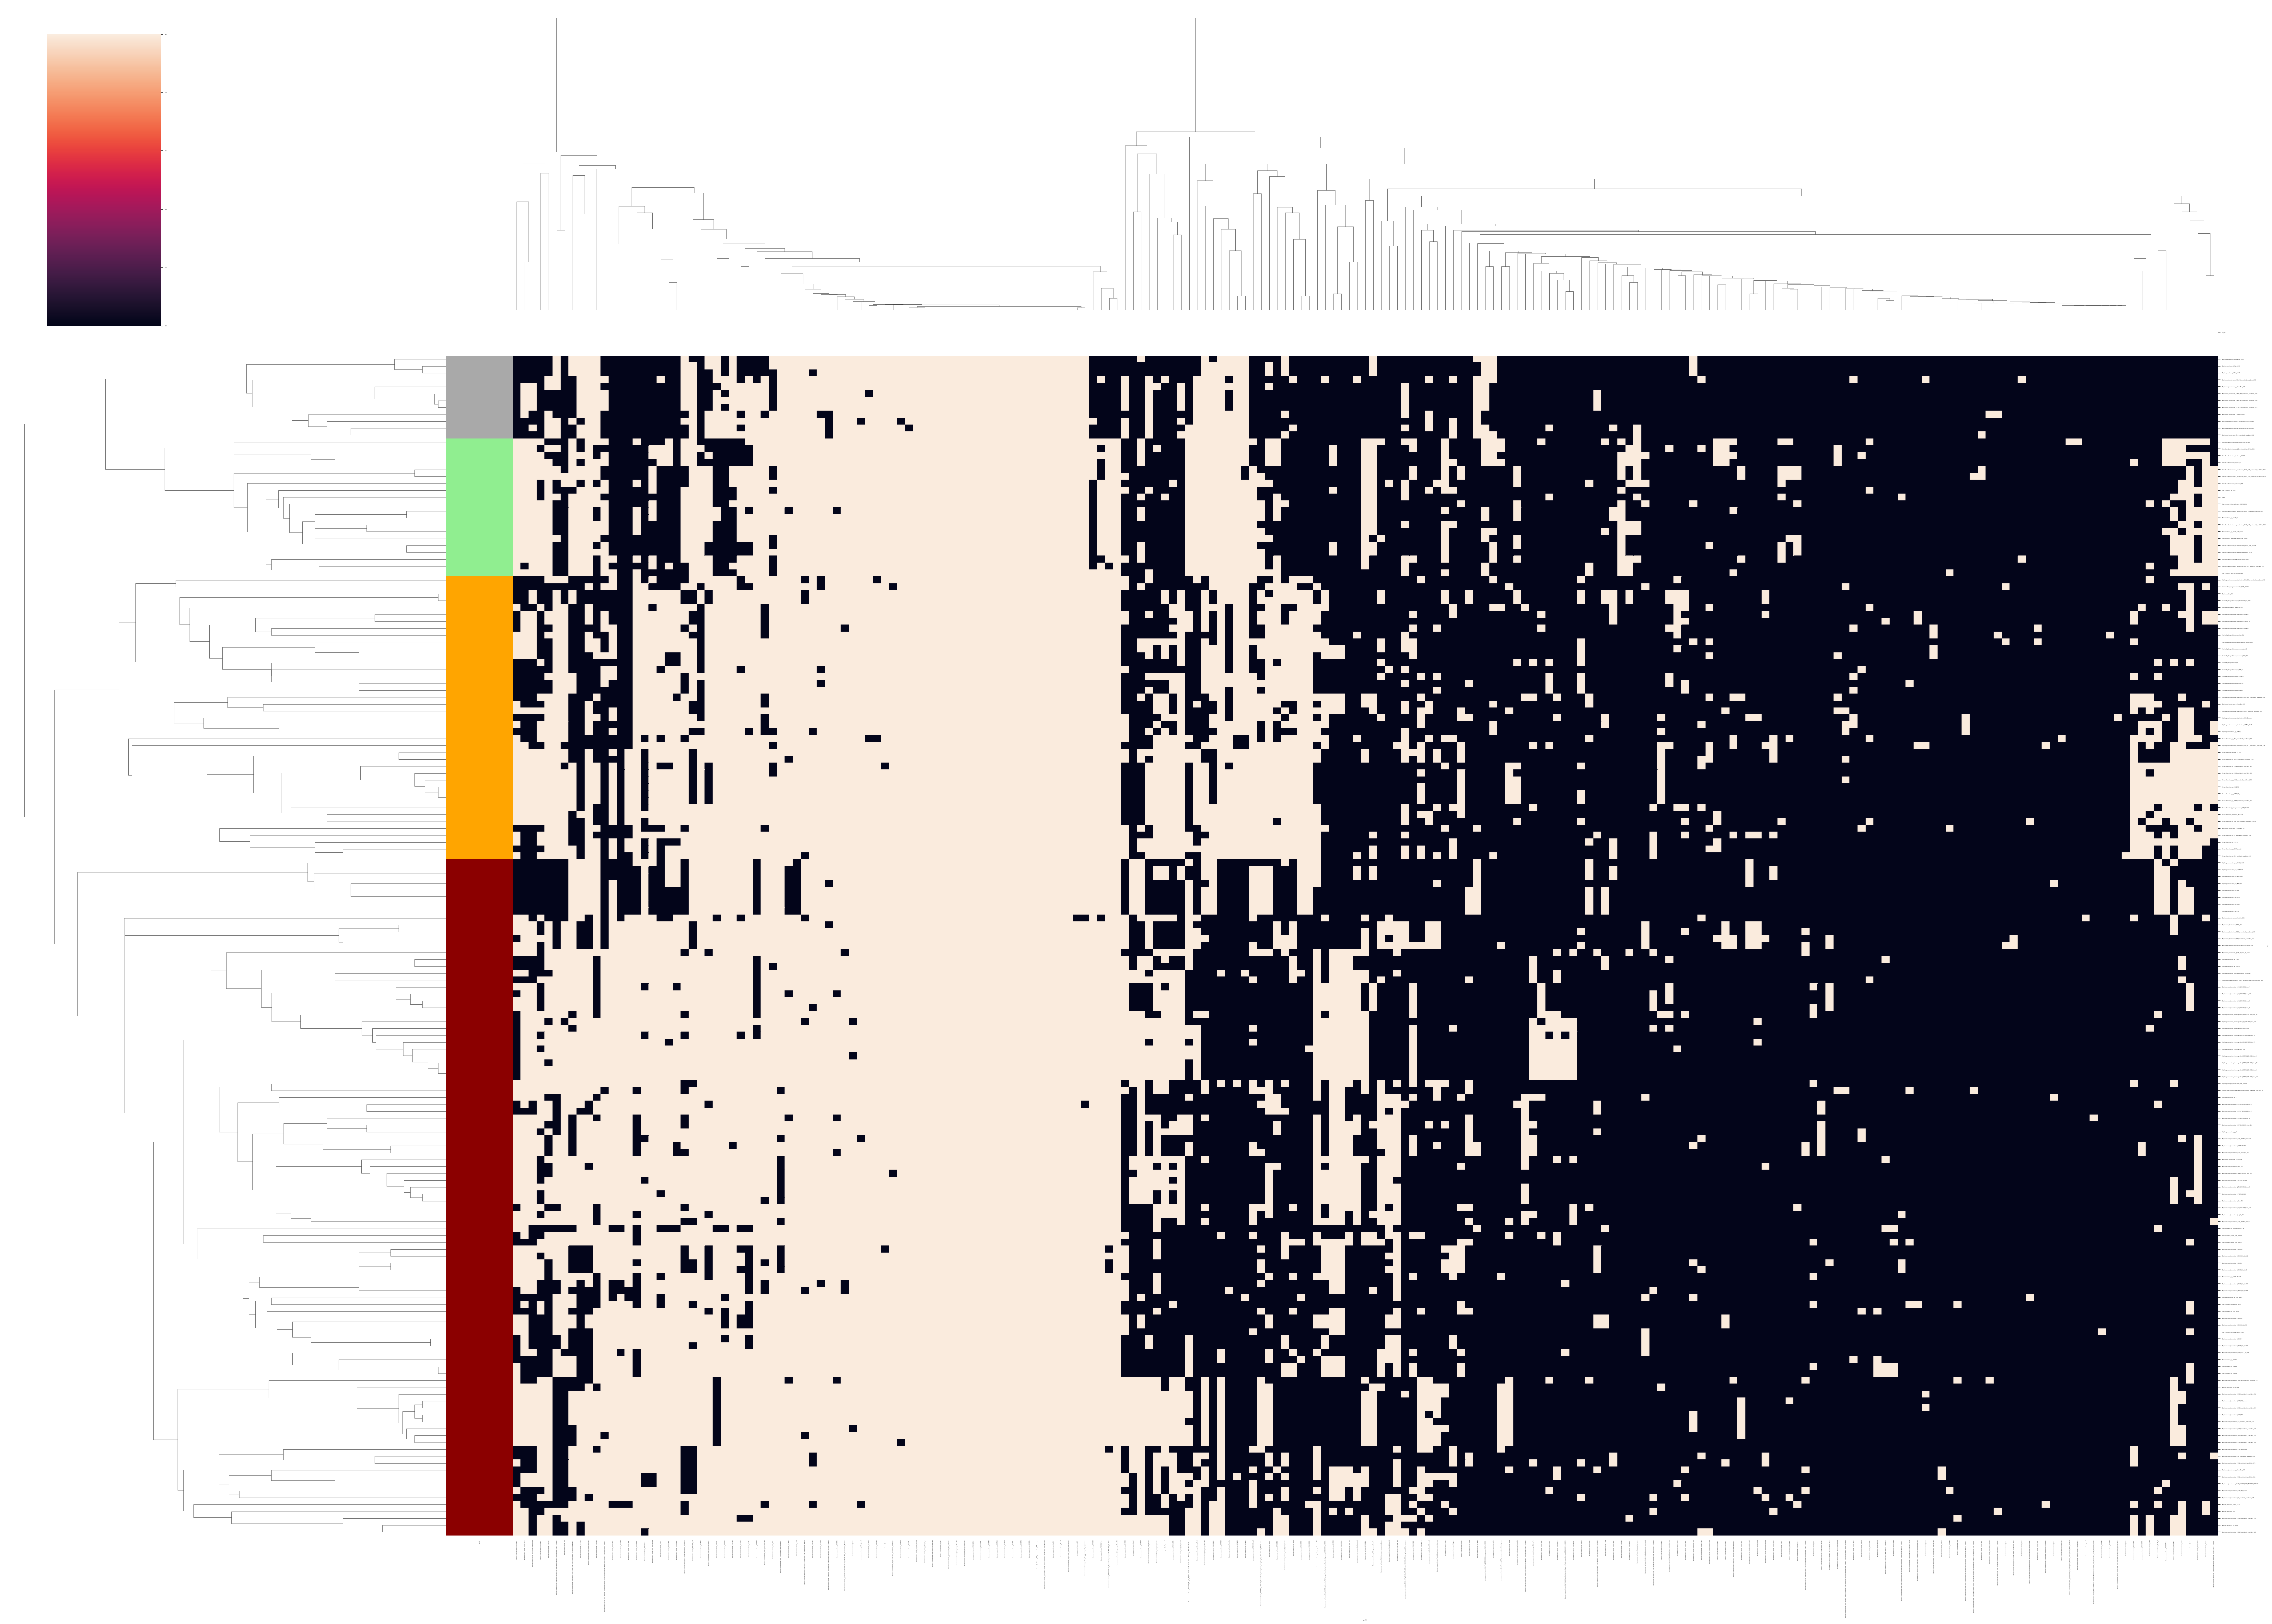

In [14]:

selected_models = ["barosa"]

heat_df_selected = heat_df[
    heat_df.columns[
        heat_df.columns.str.startswith(tuple(selected_models))
    ]
]

clustermap(
    data=heat_df_selected,
    method="average",
    metric="hamming",
    row_colors=family_colors,
    col_colors=cycle_colors,
    figsize=(70, 50)
)
plt.savefig(
    os.path.join(
        DATA_DIR,
        f"heatmap-{'-'.join(selected_models)}.svg"
    ),
    # dpi=600
)

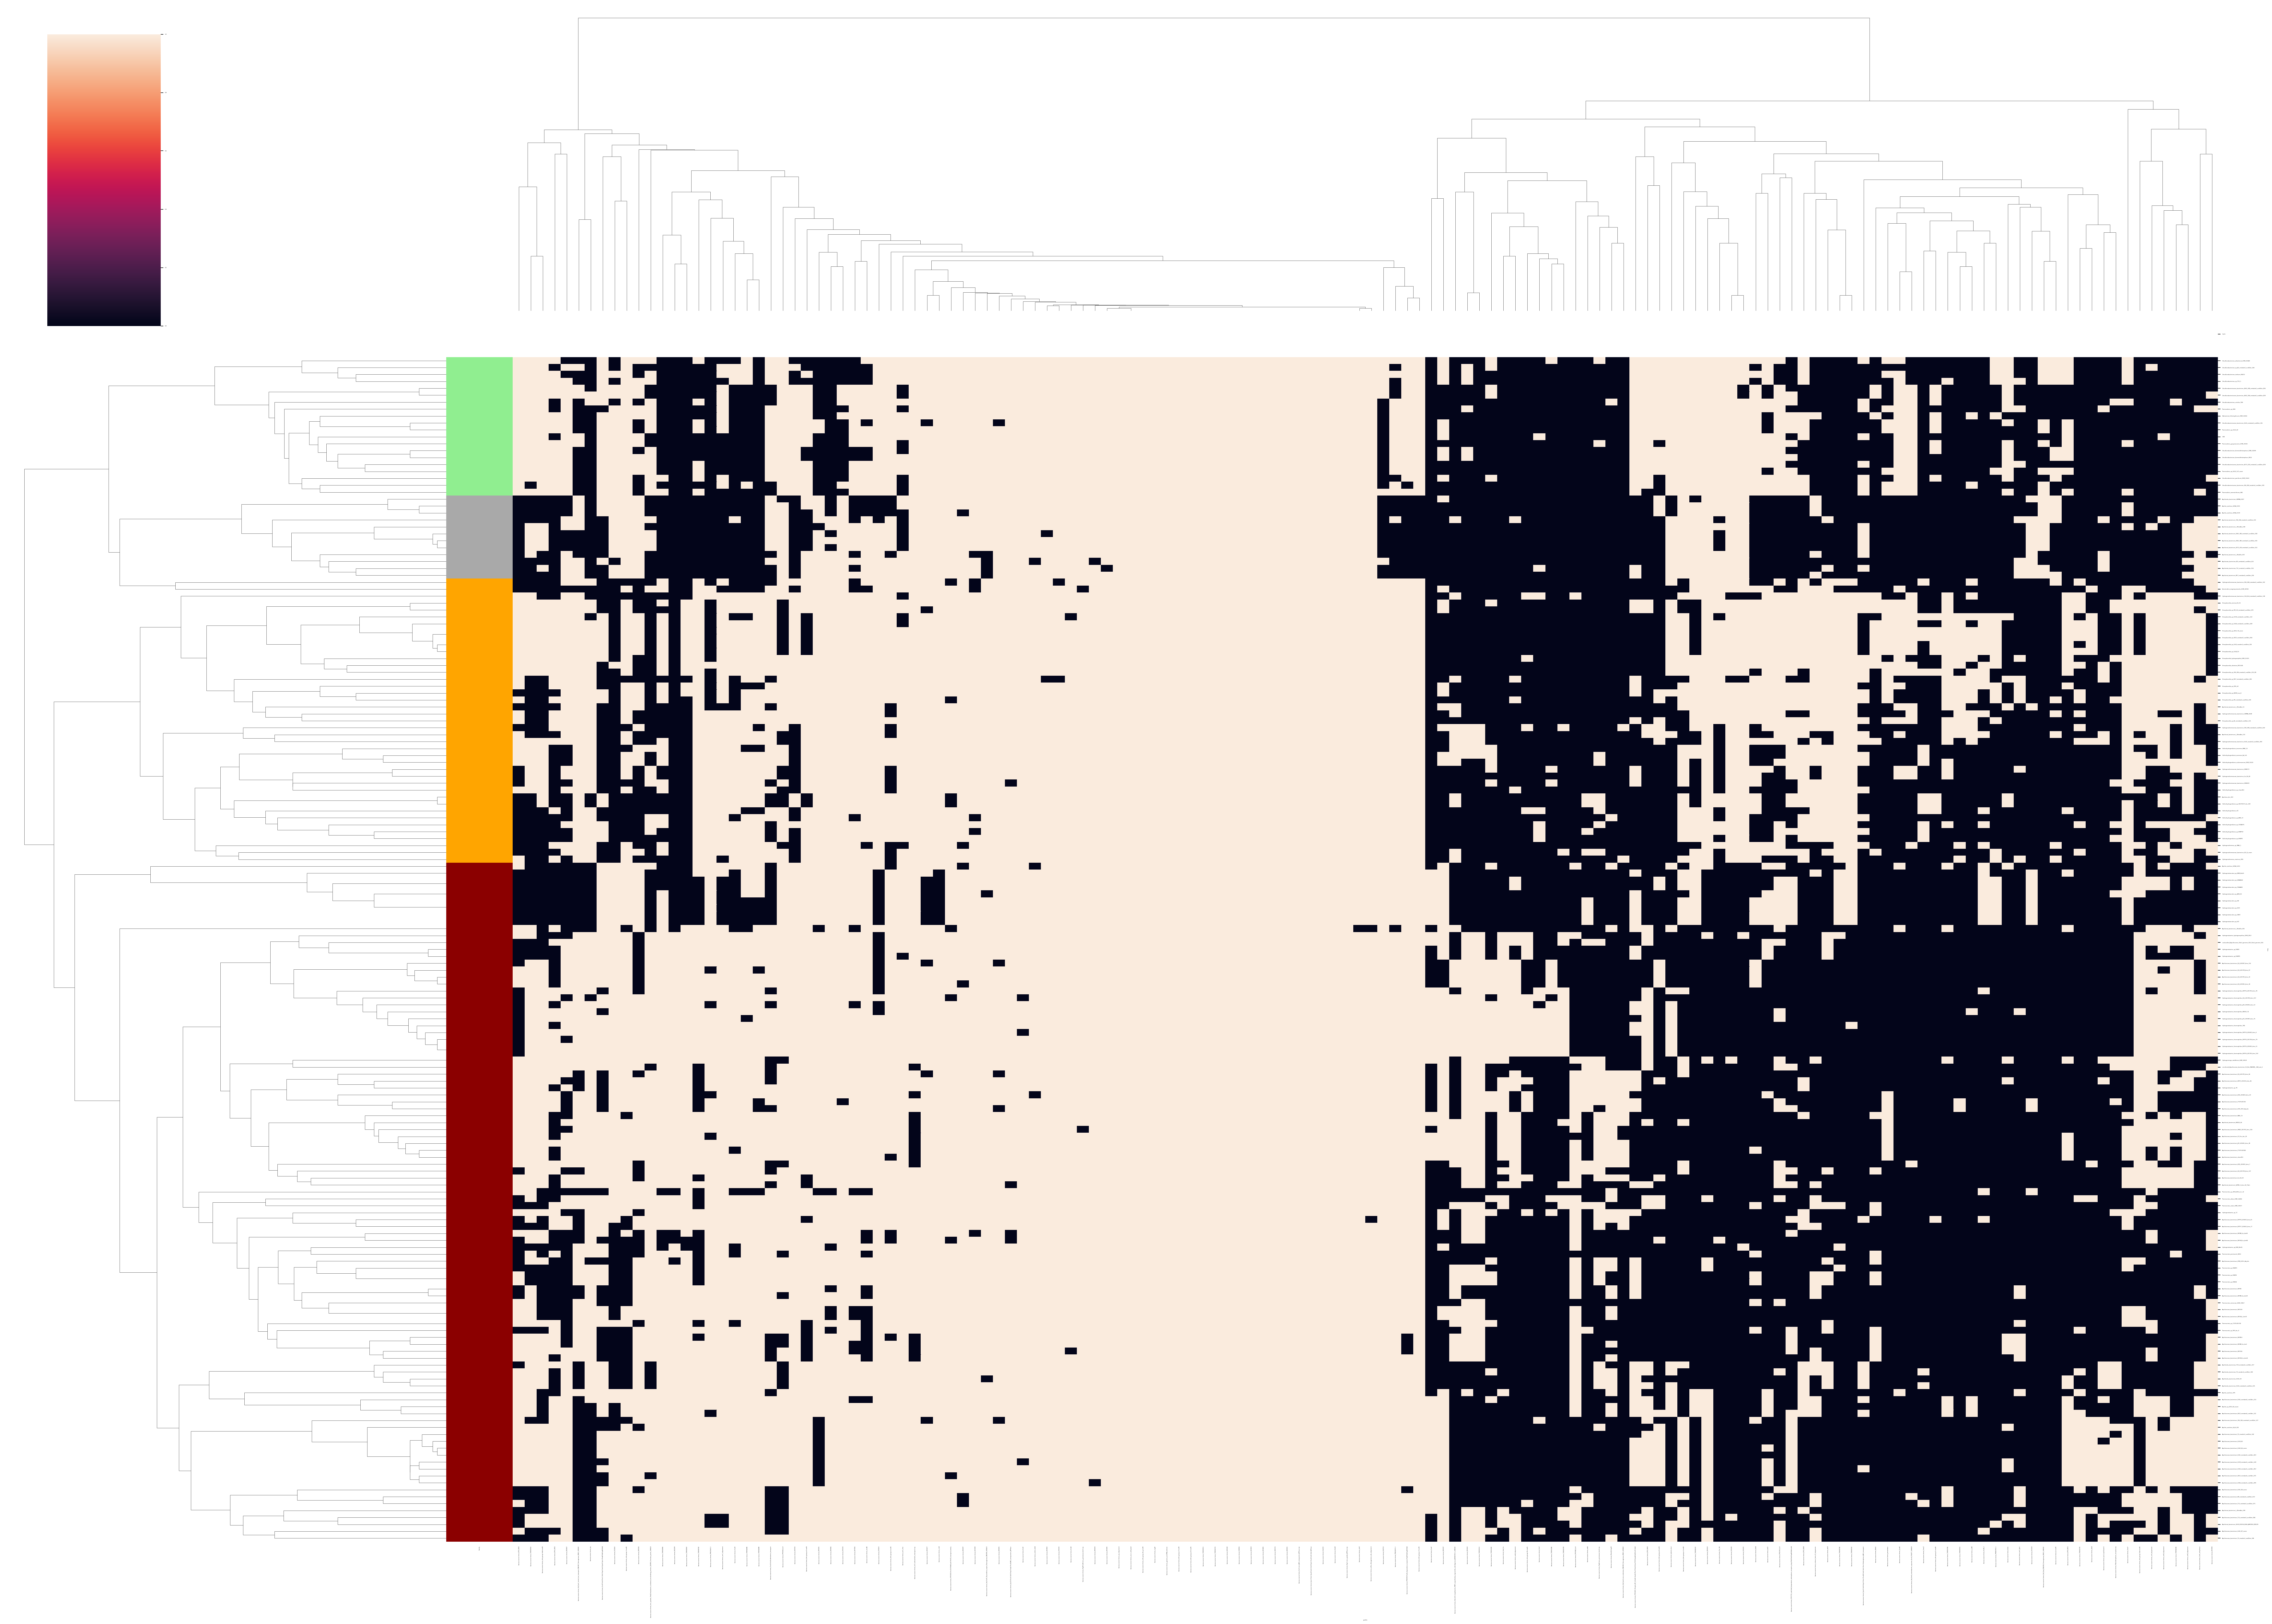

In [15]:
threshold = 0.90
non_zero_columns = heat_df_selected.columns[
    (heat_df_selected == 0).mean() < threshold
]

heat_df_selected = heat_df_selected[non_zero_columns]


clustermap(
    data=heat_df_selected,
    method="average",
    metric="hamming",
    row_colors=family_colors,
    col_colors=cycle_colors,
    figsize=(70, 50)
)
plt.savefig(
    os.path.join(
        DATA_DIR,
        f"heatmap-{'-'.join(selected_models)}.svg"
    ),
    # dpi=200
)

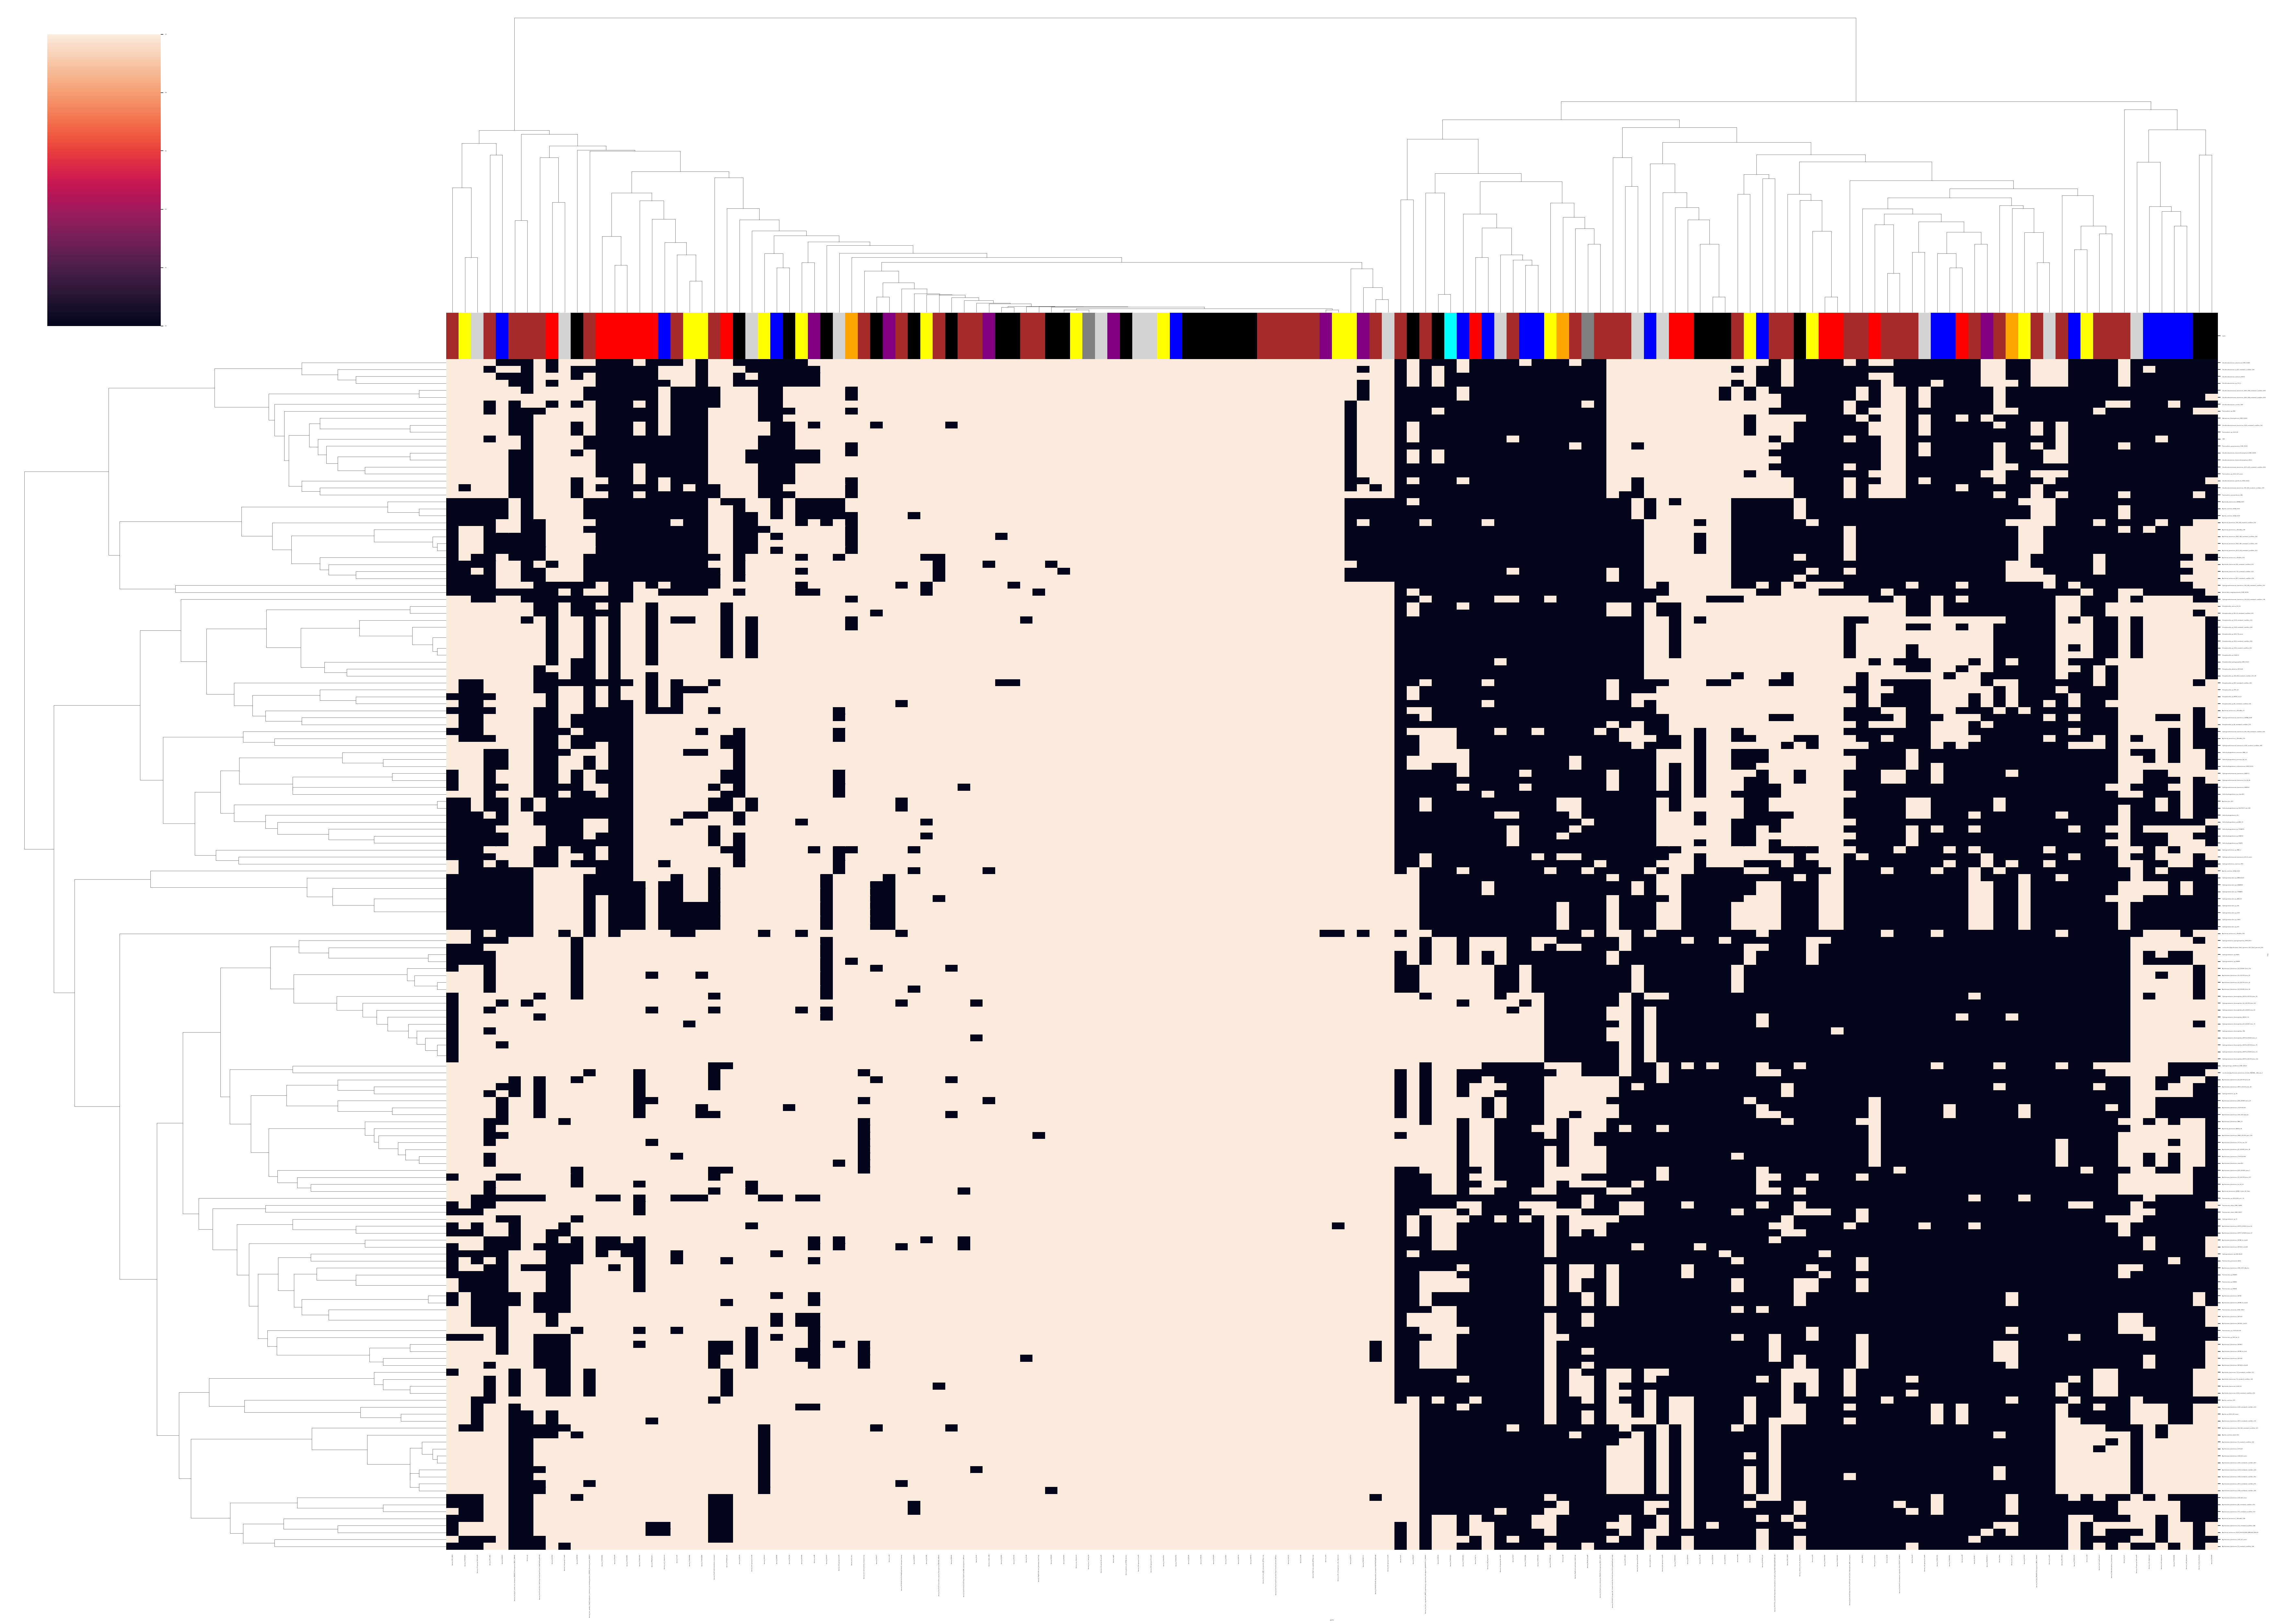

In [43]:
threshold = 0.90
non_zero_columns = heat_df_2.columns[
    (heat_df_2 == 0).mean() < threshold
]

heat_df_2 = heat_df_2[non_zero_columns]


clustermap(
    data=heat_df_2,
    method="average",
    metric="hamming",
    col_colors=cycle_colors,
    figsize=(70, 50)
)

plt.savefig(
    os.path.join(
        DATA_DIR,
        f"heatmap-{'-'.join(selected_models)}.svg"
    ),
    # dpi=600
)

In [40]:
heat_df_2 = heat_df.copy()  # Create a copy of the DataFrame (optional)
heat_df_2.columns = heat_df_2.columns.str.replace('barosa.source.hmm_', 'barosa_')
heat_df_2

profile,barosa_Carb_anhydrase,barosa_Cyc1,barosa_Cyc2_repCluster1,barosa_Cyc2_repCluster2,barosa_Cyc2_repCluster3,barosa_CymA,barosa_DFE_0448,barosa_DFE_0449,barosa_DFE_0450,barosa_DFE_0451,...,barosa_rubisco_form_IV_alignment,barosa_rubisco_form_I_alignment,barosa_sir,barosa_sodN,barosa_soluble_methane_monooxygenase_mmoD.hmm,barosa_soxC,barosa_sqr_alignment,barosa_sulfocyanin,barosa_sulfur_dioxygenase_sdo_alignment,barosa_zip
mag,,,,,,,,,,,,,,,,,,,,,
Aquifex_aeolicus_HyVt_501,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Aquifex_aeolicus_SZUA_1413,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Aquifex_aeolicus_SZUA_1501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Aquifex_aeolicus_SZUA_1519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Aquifex_aeolicus_VF5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thermovibrio_sp_S012_127_esom,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Thermovibrio_sp_S141_83,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Venenivibrio_stagnispumantis_DSM_18763,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


ValueError: Linkage must be computed on at least two observations.

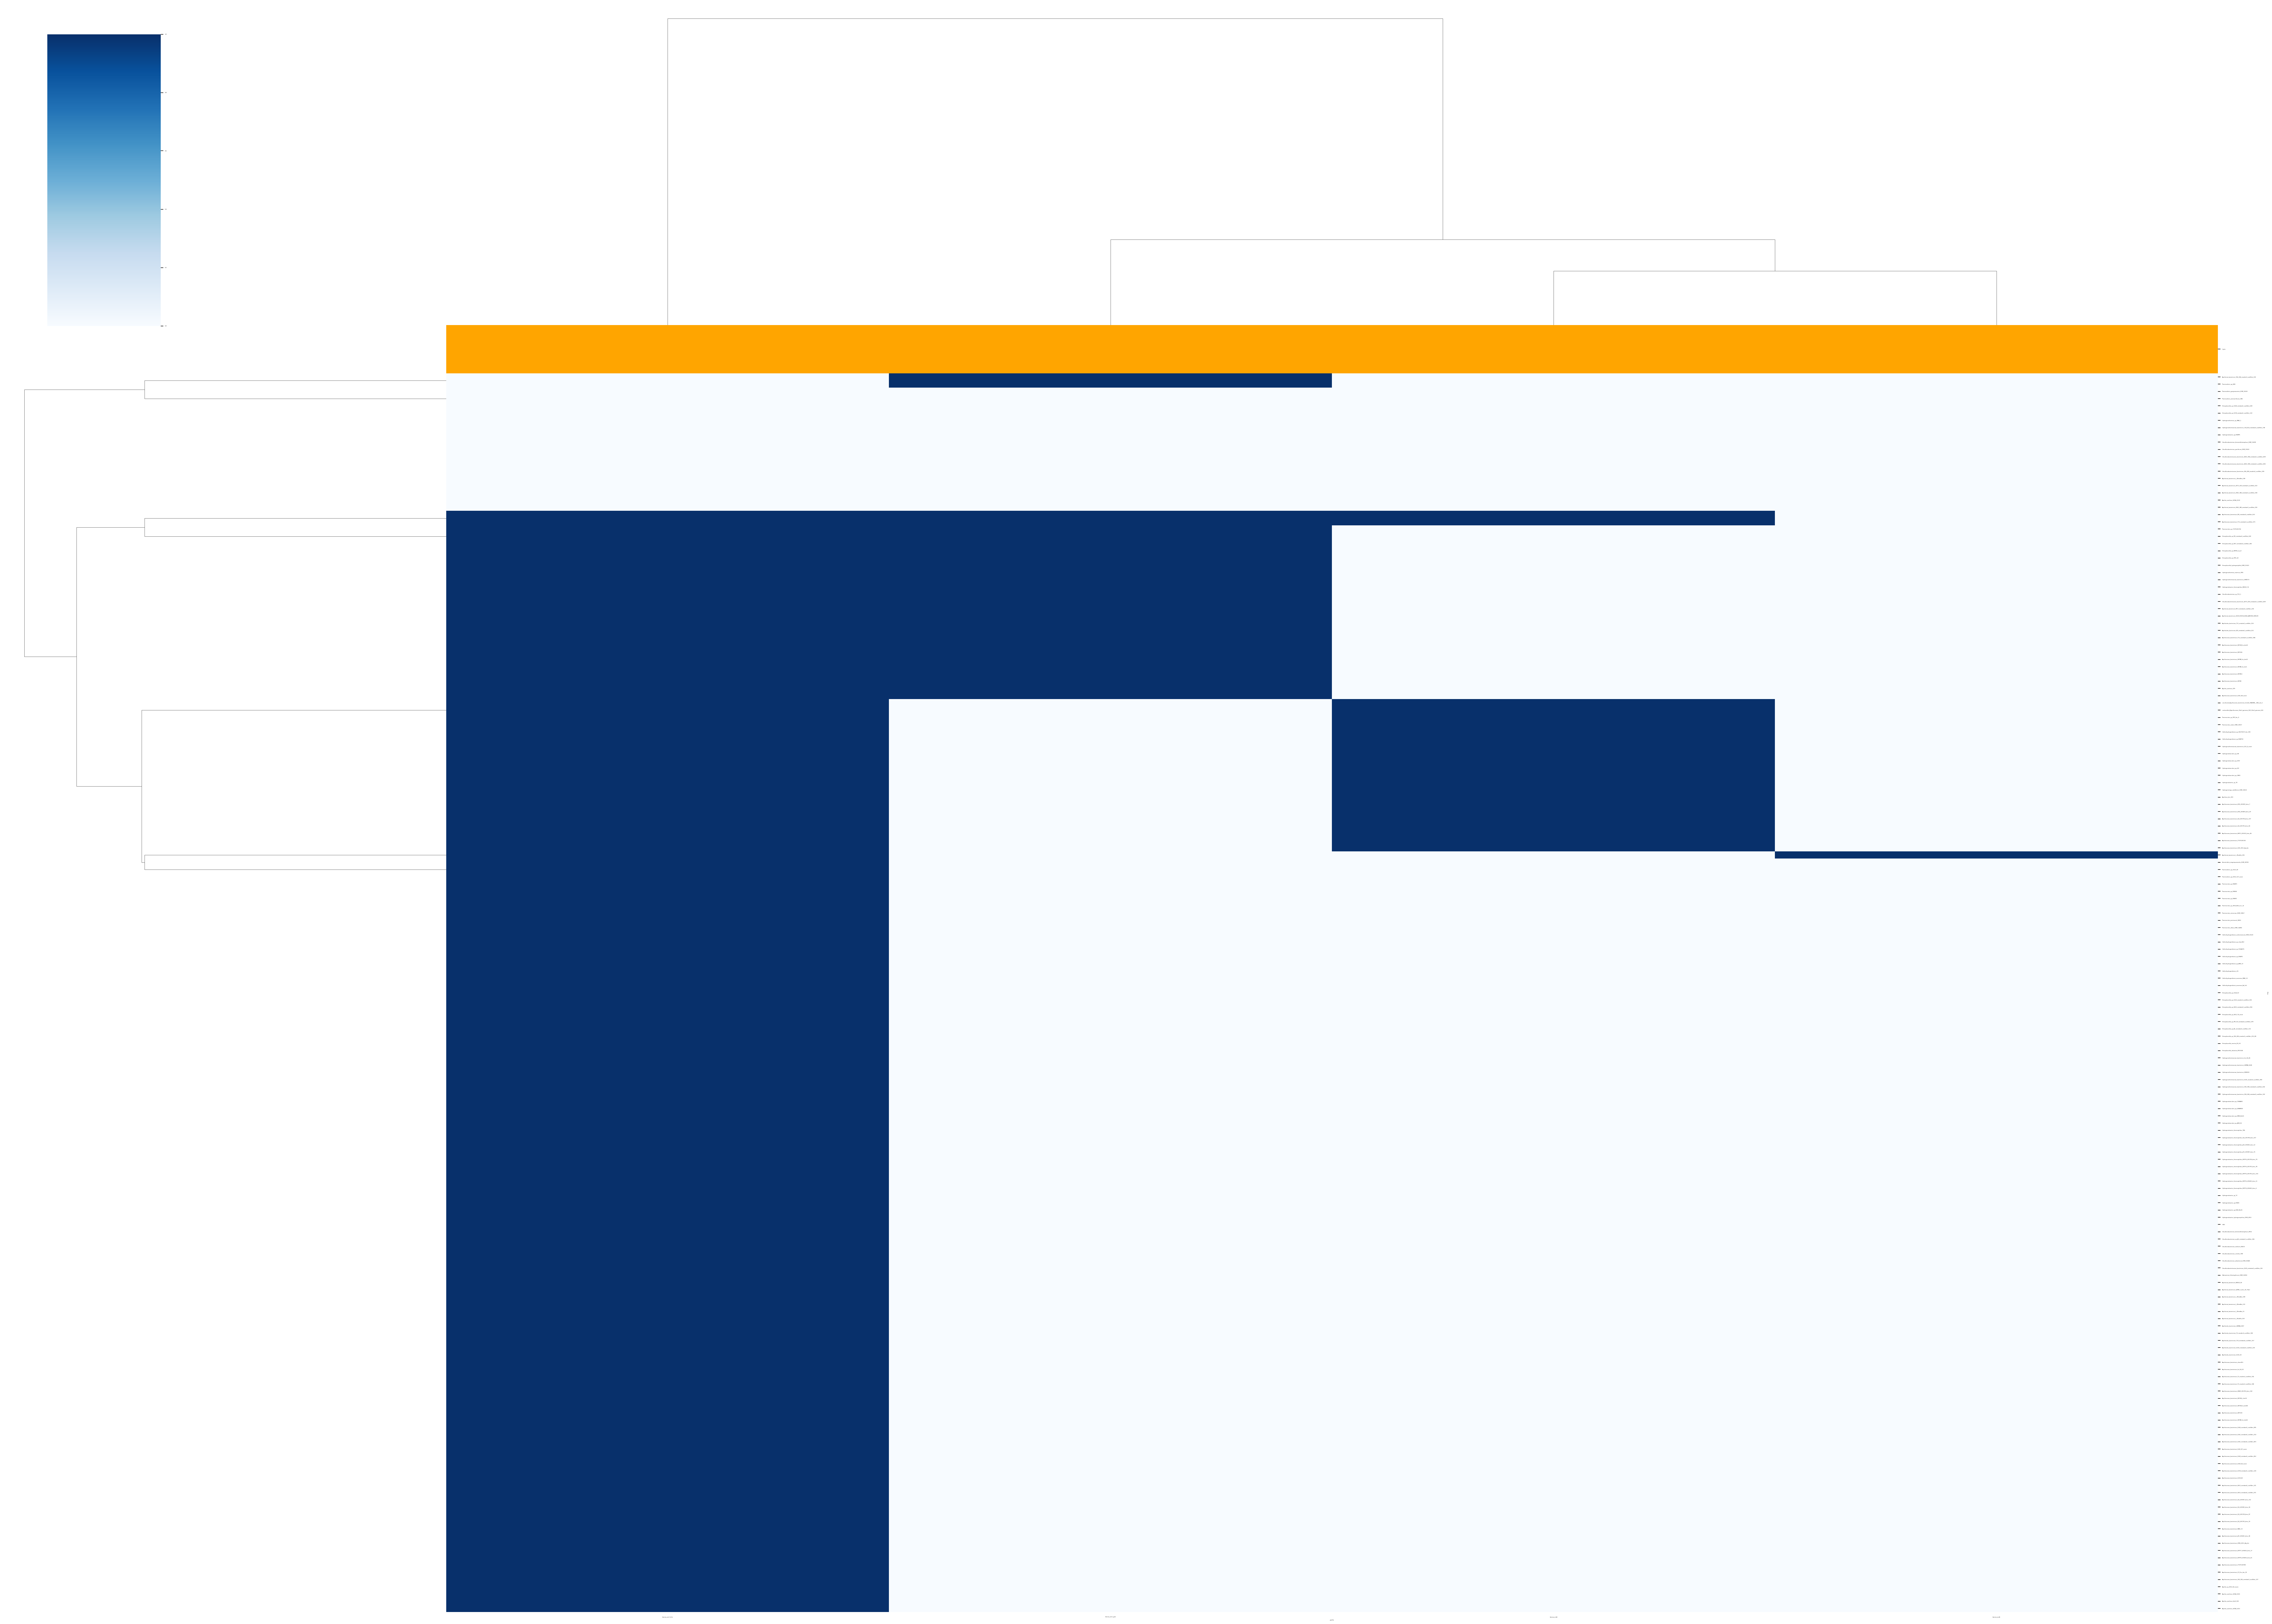

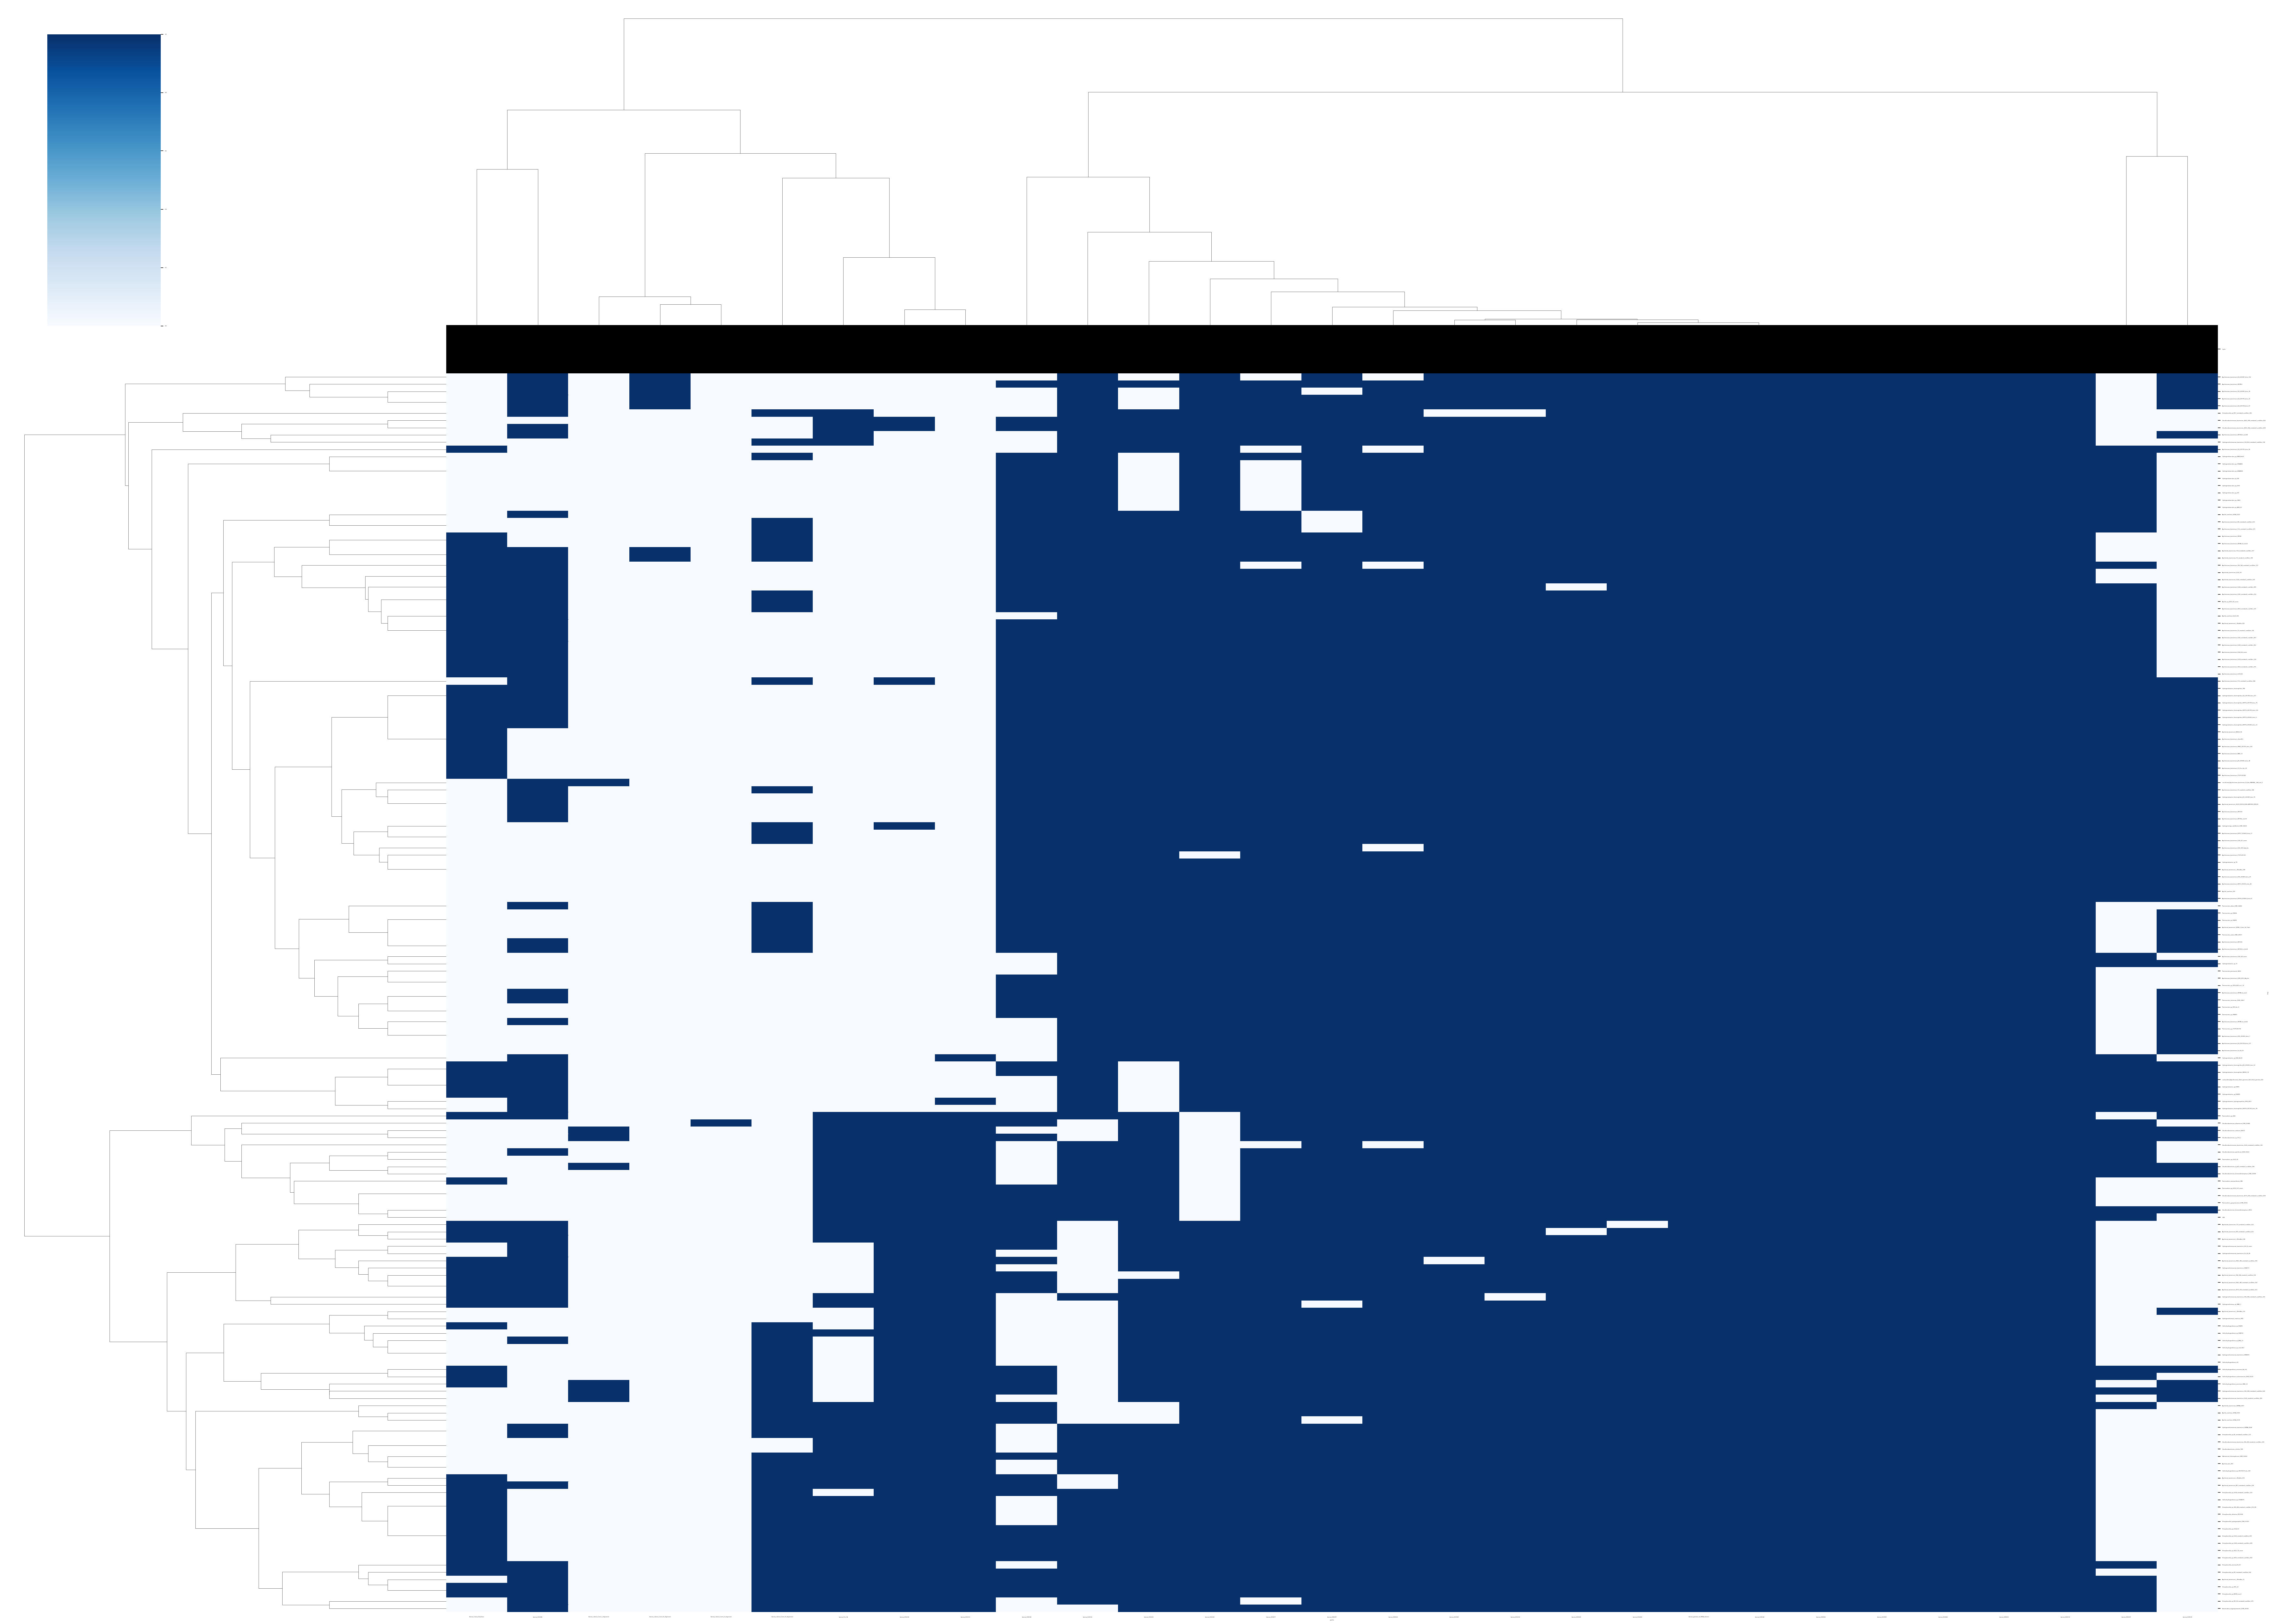

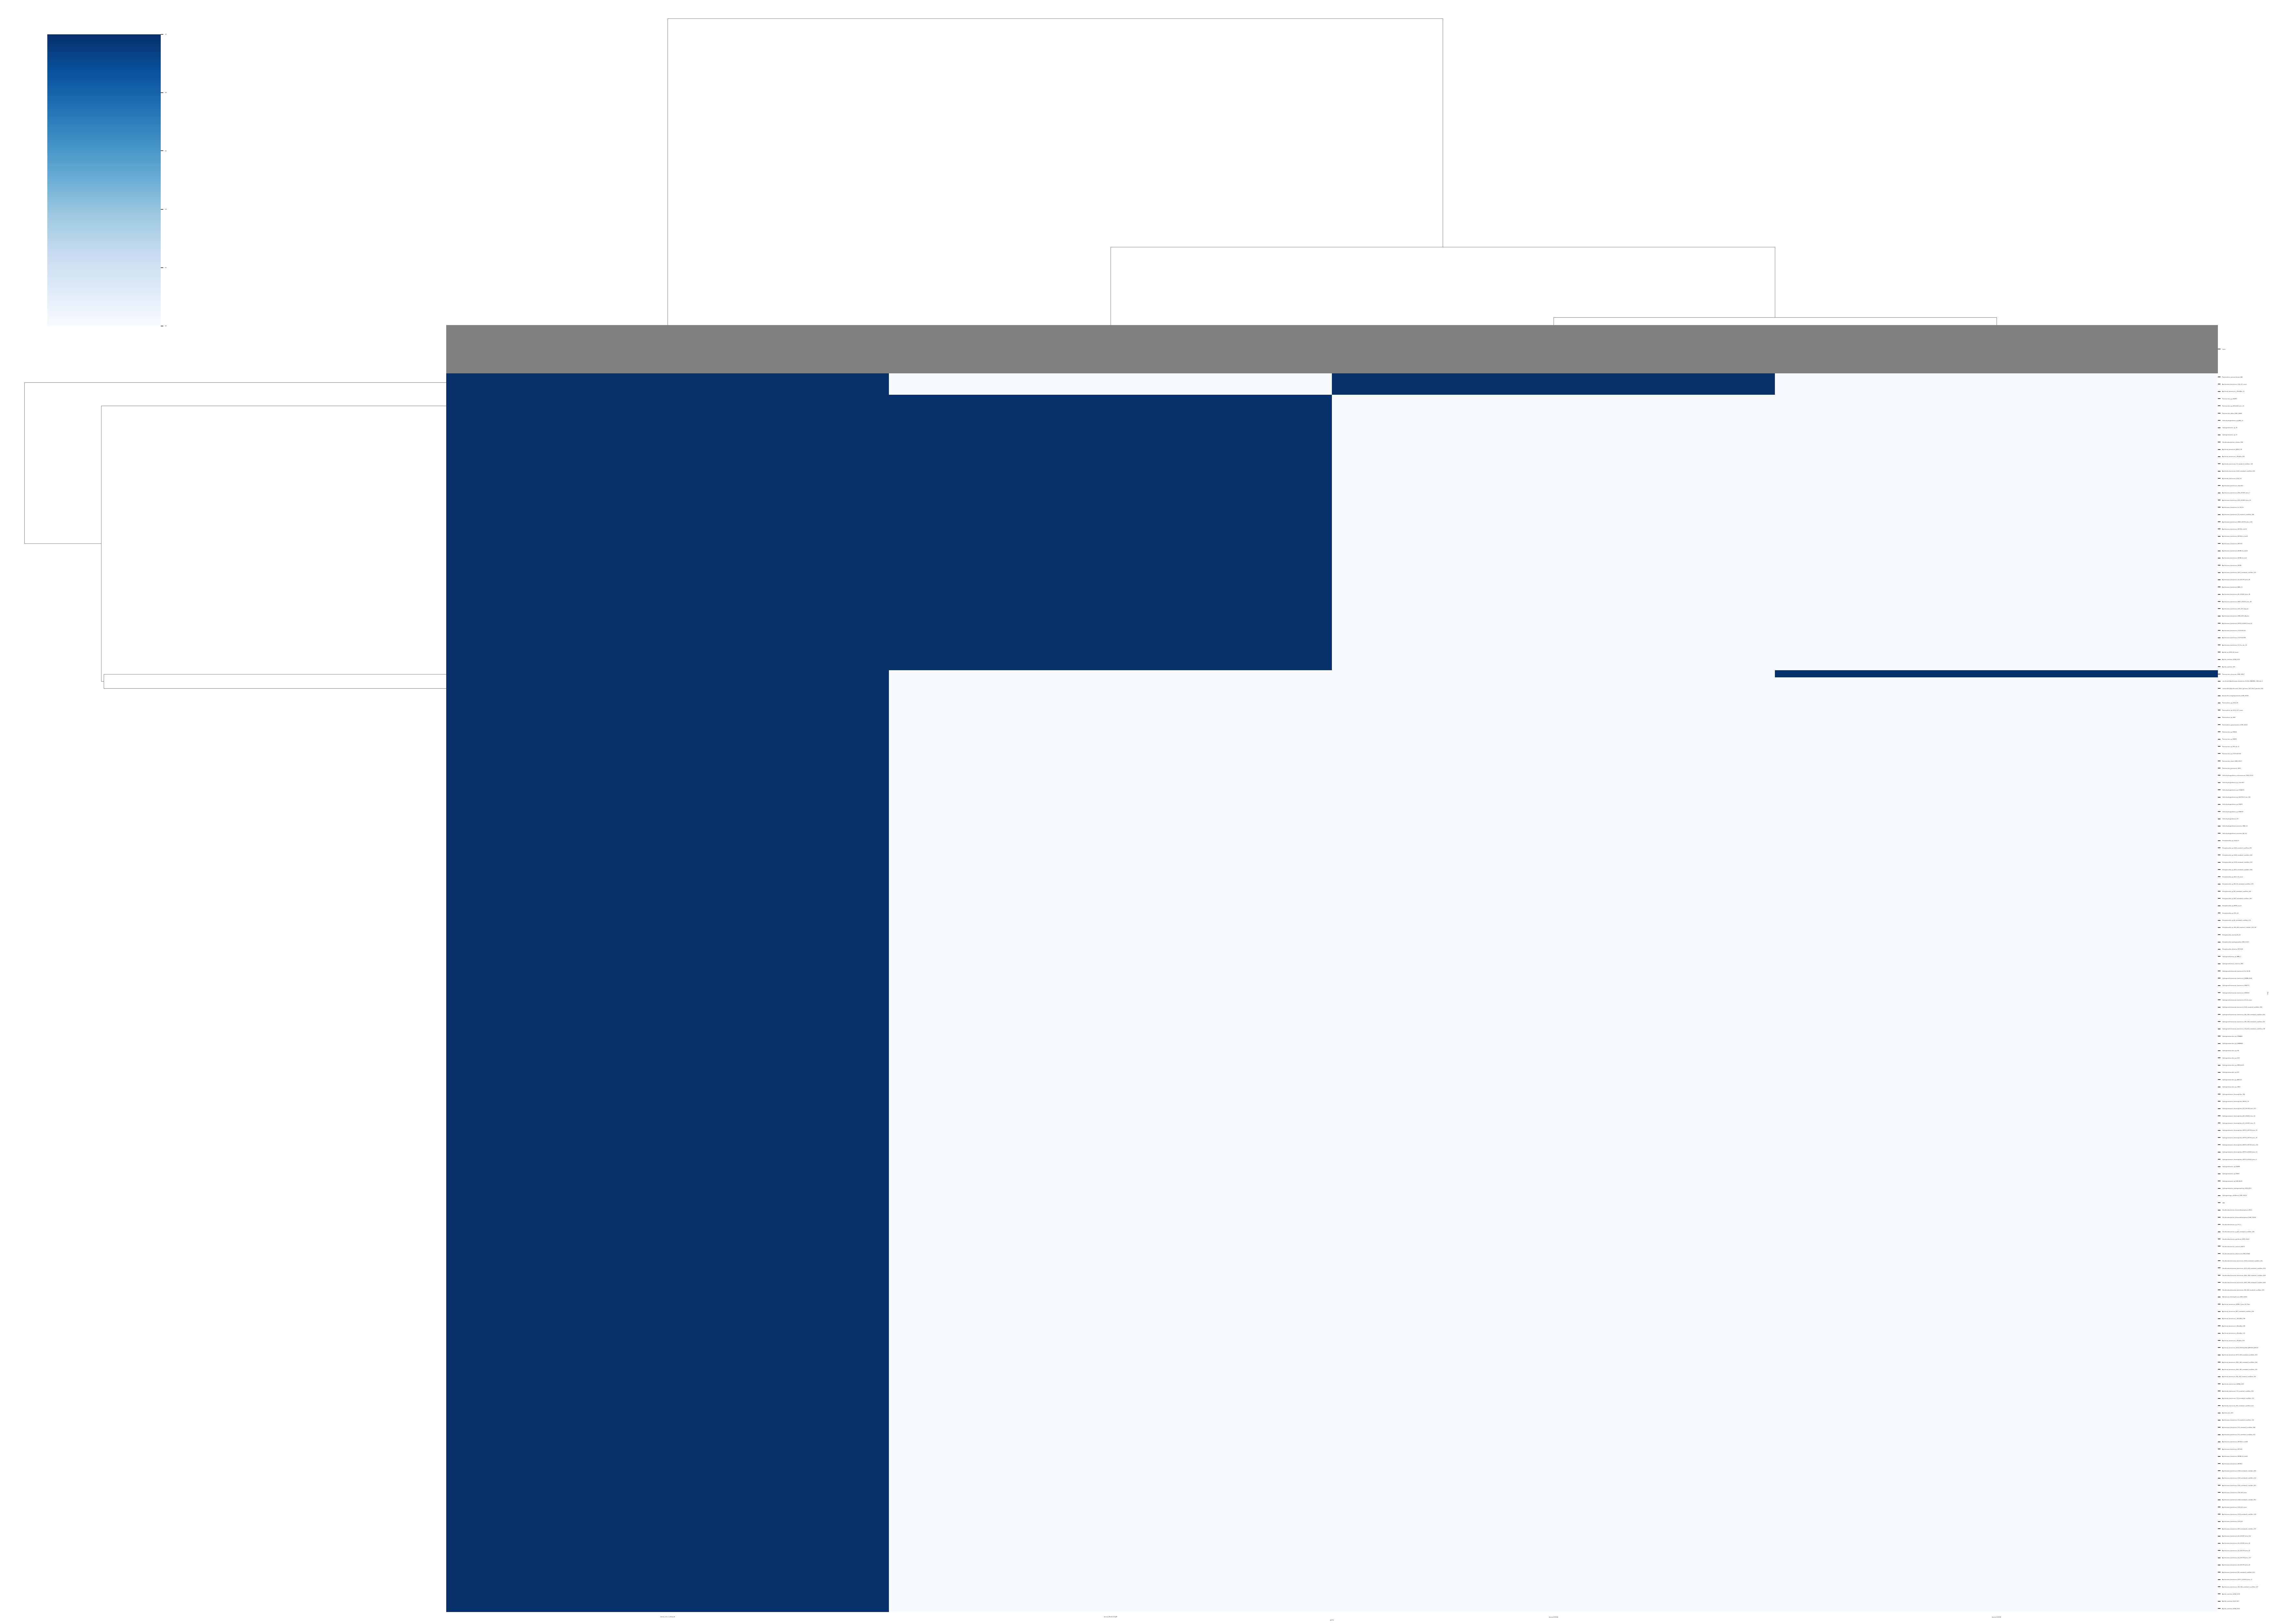

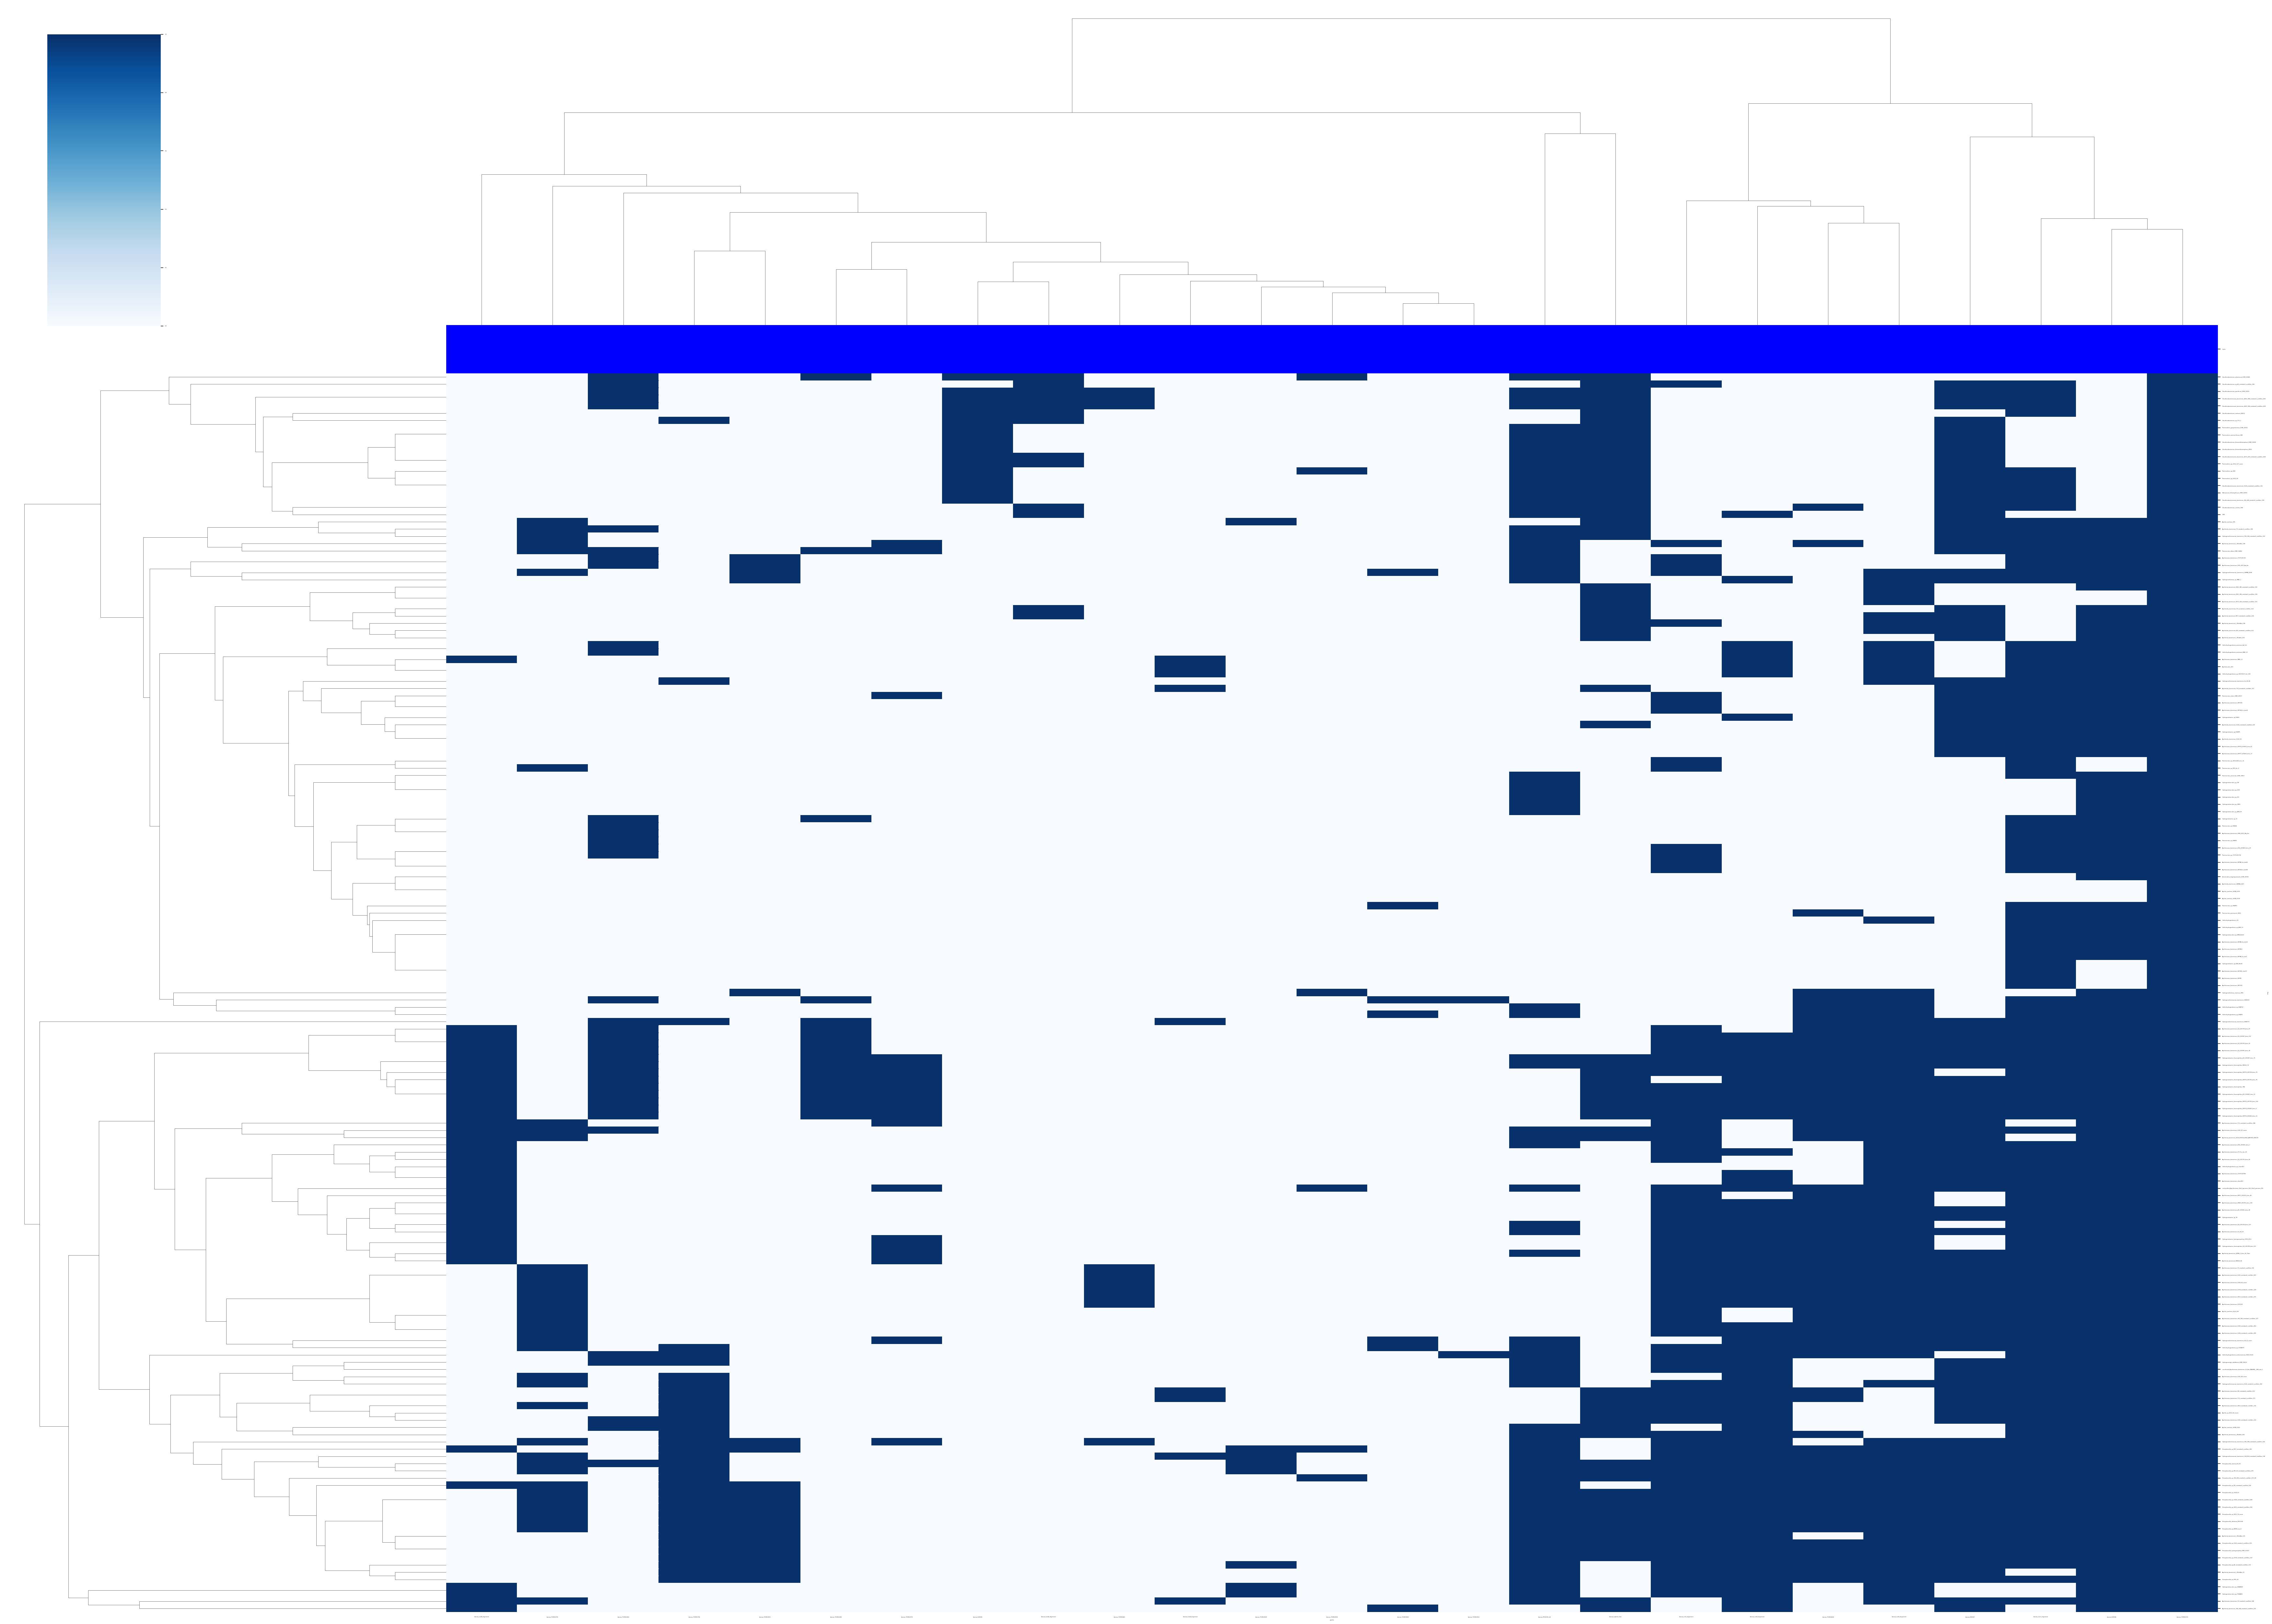

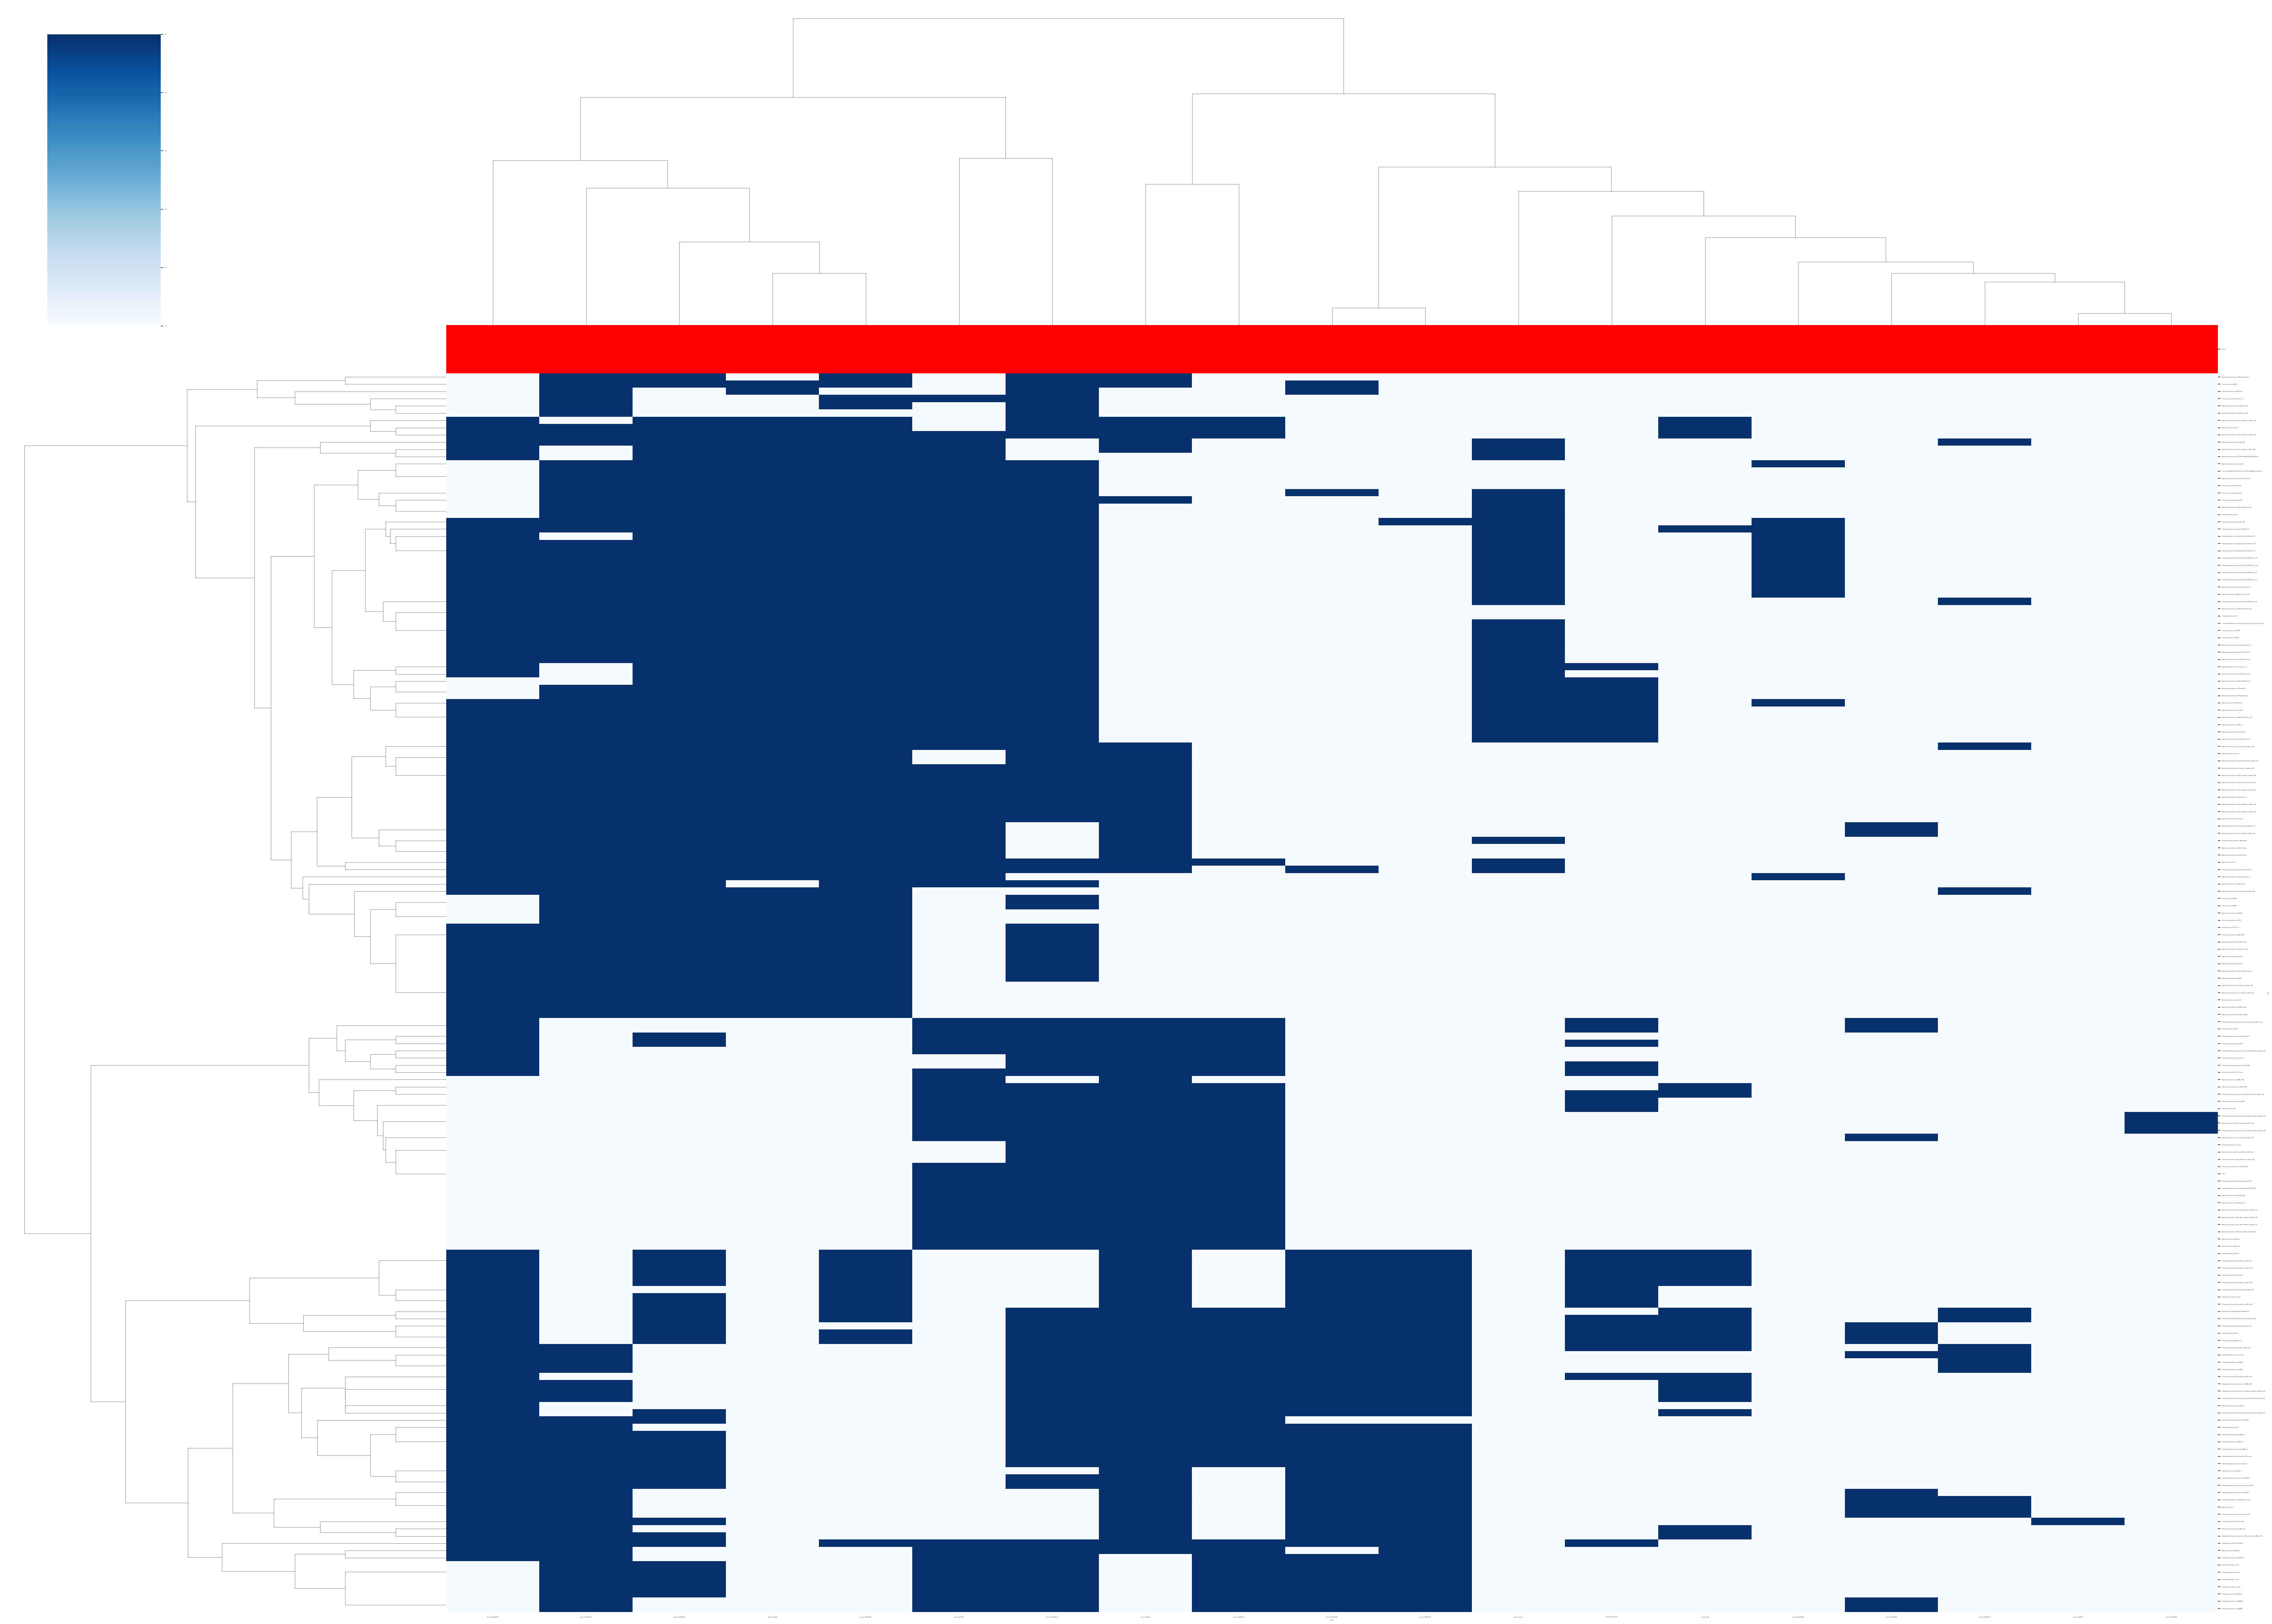

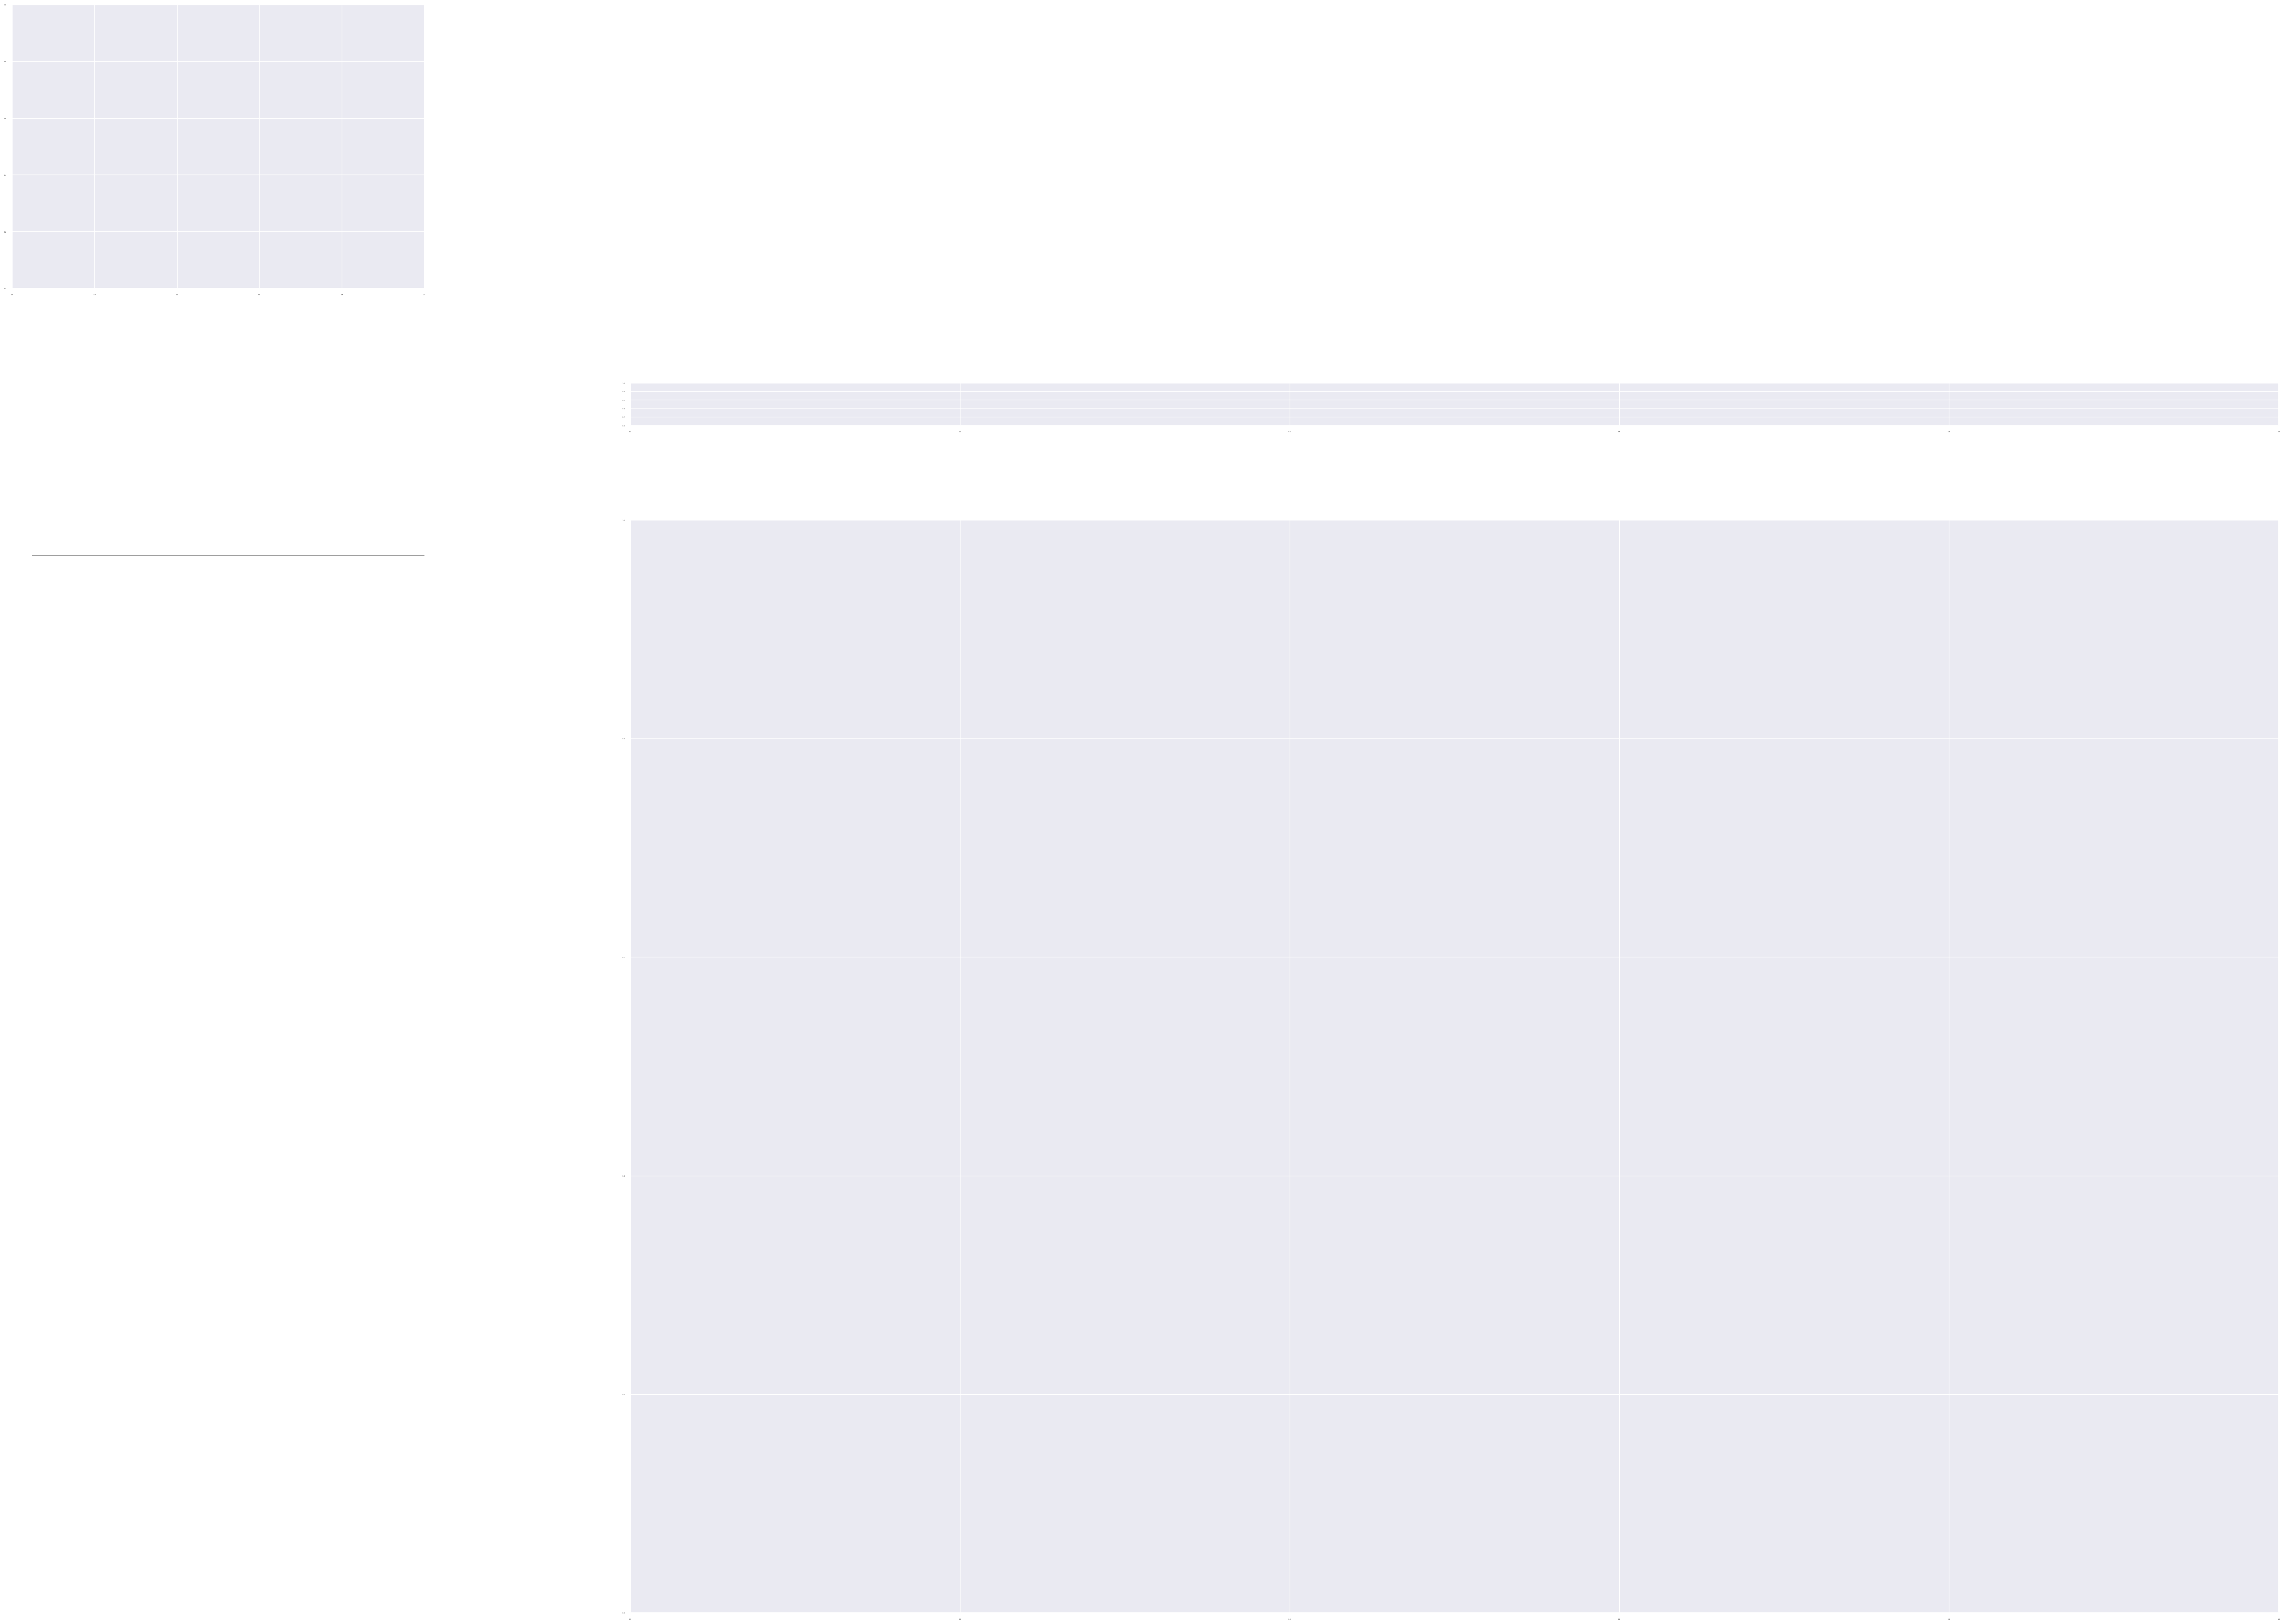

In [39]:
for cycle in metadata_df["Cycle"].unique():
    
    cycle_df = metadata_df[metadata_df["Cycle"] == cycle]
    
   
    cycle_hmm_models = cycle_df["hmm_model"].unique()
    
   
    heat_df_cycle = heat_df_2[[col for col in heat_df_2.columns if col in cycle_hmm_models]]
    
    
    sns.clustermap(
        data=heat_df_cycle,   
        method="average",
        metric="hamming",     
        col_colors=cycle_colors,  
        cmap="Blues",
        figsize=(70, 50)      
    )

